# Notebook to select columns useful for SED fitting with CIGALE

### We will select the continuum from Laigle et al., 2015 + redshifts; emission lines from FMOS
### No need to have lines for the SED fitting but for the comparison

#### Photometry in mJy and emission line fluxes correcte dby apperture and in W/m$^2$

In [4]:
# Importing regular packages. The herschelhelp_internal.utils is already installed in my machine
# so the only thing I have to do is to run the 'source activate herschelhelp_internal' in the terminal 
# and after that change the kernel in the notebook. 

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from astropy.table import Table, Column, vstack
import pandas as pd
import scipy.integrate as integrate
import os
from astropy import units as u
from uncertainties import ufloat
from uncertainties.umath import *
from astropy.coordinates import SkyCoord, ICRS
from astropy import visualization as vz
from matplotlib.legend_handler import HandlerPathCollection

%matplotlib inline

In [2]:
# Laigle et al., 2015 and FMOS data sets
# Merged data set

# phot  = Table.read('/Users/lam/Desktop/MOONS/MOONS_2021/COSMOS_Laigle/
#                    'COSMOS2015_Laigle+_v1.1.fits', format = 'fits')

# lines = Table.read('/Users/lam/Desktop/MOONS/MOONS_2021/FMOS/'
#                    'fmos_cosmos_spectroscopy_extra.v20180725.fits', format = 'fits')

data  = Table.read('/Users/lam/Desktop/MOONS/MOONS_2021/'
                   'Laigle_FMOS_2021_0.1arcsec.fits', format = 'fits')


In [3]:
len(data)

3056

In [3]:
Bands_Laigle = ['u_FLUX_APER3', 'B_FLUX_APER3', 'V_FLUX_APER3', 'r_FLUX_APER3',\
               'ip_FLUX_APER3', 'zpp_FLUX_APER3', 'yHSC_FLUX_APER3', 'J_FLUX_APER3',\
               'H_FLUX_APER3', 'Ks_FLUX_APER3', 'SPLASH_1_FLUX', 'SPLASH_2_FLUX',\
               'SPLASH_3_FLUX', 'SPLASH_4_FLUX', 'F_MIPS_24']

In [19]:
bands_nolines = ['galex.NUV', 'cfht.megacam.u', 'subaru.suprime.B', 'subaru.suprime.V', 'subaru.suprime.r',
                 'subaru.suprime.i', 'subaru.suprime.z', 'subaru.hsc.y', 'UKIRT_WFCJ', 'cfht.wircam.H', 'WFCAM_K',
                 'IRAC1', 'IRAC2', 'IRAC3', 'IRAC4']

wl_phot = [2.29924500e-01, 3.82657613e-01, 4.44802344e-01, 5.47022023e-01,
           6.27552396e-01, 7.67126647e-01, 9.02821612e-01, 9.78660196e-01,
           1.25358020e+00, 1.62868125e+00, 2.23330676e+00, 3.55669064e+00,
           4.50196520e+00, 5.74500412e+00, 7.91821223e+00]

# Correcting Photometry

In [4]:
# Aperture magnitudes must be corrected (MAG_APER3)
# Following appendix 2 in Laigle et al., 2016

#NOTE: this procedure can be avoided if one used MAG_AUTO. However, this measurements are 
# noisier than the ones computed using MAG_APER3 which must be taken into account for photometric redshift
# calculations. The total fluxes must not be too different, only for the faintest sources. 

flux_aper      =   ['u_FLUX_APER3', 'B_FLUX_APER3', 'V_FLUX_APER3', 'r_FLUX_APER3',\
                    'ip_FLUX_APER3', 'zpp_FLUX_APER3', 'yHSC_FLUX_APER3', 'J_FLUX_APER3',\
                    'H_FLUX_APER3', 'Ks_FLUX_APER3', 'Hw_FLUX_APER3', 'Ksw_FLUX_APER3']

fluxerr_aper   =   ['u_FLUXERR_APER3', 'B_FLUXERR_APER3', 'V_FLUXERR_APER3', 'r_FLUXERR_APER3',\
                    'ip_FLUXERR_APER3', 'zpp_FLUXERR_APER3', 'yHSC_FLUXERR_APER3', 'J_FLUXERR_APER3',\
                    'H_FLUXERR_APER3', 'Ks_FLUXERR_APER3', 'Hw_FLUXERR_APER3', 'Ksw_FLUXERR_APER3']

mag_auto       =   ['u_MAG_AUTO', 'B_MAG_AUTO', 'V_MAG_AUTO', 'r_MAG_AUTO',\
                    'ip_MAG_AUTO', 'zpp_MAG_AUTO', 'yHSC_MAG_AUTO', 'J_MAG_AUTO',\
                    'H_MAG_AUTO', 'Ks_MAG_AUTO', 'Hw_MAG_AUTO', 'Ksw_MAG_AUTO']

mag_auto_sigma =   ['u_MAGERR_AUTO', 'B_MAGERR_AUTO', 'V_MAGERR_AUTO', 'r_MAGERR_AUTO',\
                    'ip_MAGERR_AUTO', 'zpp_MAGERR_AUTO', 'yHSC_MAGERR_AUTO', 'J_MAGERR_AUTO',\
                    'H_MAGERR_AUTO', 'Ks_MAGERR_AUTO', 'Hw_MAGERR_AUTO', 'Ksw_MAGERR_AUTO']

mag_aper       =   ['u_MAG_APER3', 'B_MAG_APER3', 'V_MAG_APER3', 'r_MAG_APER3',\
                    'ip_MAG_APER3', 'zpp_MAG_APER3', 'yHSC_MAG_APER3', 'J_MAG_APER3',\
                    'H_MAG_APER3', 'Ks_MAG_APER3', 'Hw_MAG_APER3', 'Ksw_MAG_APER3']

mag_aper_sigma =   ['u_MAGERR_APER3', 'B_MAGERR_APER3', 'V_MAGERR_APER3', 'r_MAGERR_APER3',\
                    'ip_MAGERR_APER3', 'zpp_MAGERR_APER3', 'yHSC_MAGERR_APER3', 'J_MAGERR_APER3',\
                    'H_MAGERR_APER3', 'Ks_MAGERR_APER3', 'Hw_MAGERR_APER3', 'Ksw_MAGERR_APER3']

In [5]:
# Laigle et al., 2016 table 3, page 8
systematic_offset_perband   = [0.010, 0.146, -0.117, -0.012,\
                               0.020, -0.084, -0.014, 0.017,\
                               0.055, -0.001, -0.031, 0.068]

foreground_extinction       = [4.660, 4.020, 3.117, 2.660,\
                               1.991, 1.461, 1.298, 0.871,\
                               0.563, 0.364, 0.563, 0.364]

systematic_uncertainty_UD   = [3.3, 1.8, 1.9, 1.7,\
                               1.7, 2.9, 2.7, 3.3,\
                               3.1, 3.1, 3.2, 3.4]

systematic_uncertainty_Deep = [3.3, 1.8, 1.9, 1.7,\
                               1.7, 2.9, 2.7, 2.9,\
                               2.9, 2.6, 3.2, 3.4]

# Number of measurements. Number of bands involved
N = len(data)
D = len(flux_aper)

In [6]:
#===================================================================================================================
# Correcting the magnitudes
#===================================================================================================================

photometric_offset_mag = data['OFFSET']

magnitudes_corrected   = np.zeros((N,D))
for j in range(len(data)):
    for i in range(len(systematic_offset_perband)):
    
        mag_aper_perband  = data[mag_aper[i]][j]
    
        mag_total = mag_aper_perband + photometric_offset_mag[j] - systematic_offset_perband[i] -\
                    data['EBV'][j]*foreground_extinction[i]
    
        magnitudes_corrected[j][i] = mag_total
                

corrected_mag_err        = np.zeros((N,D))
for j in range(len(data)):
    for i in range(len(systematic_offset_perband)):
        
        err_aper3 = data[mag_aper_sigma[i]][j]

        err_total = err_aper3

        corrected_mag_err[j][i] = err_total       


# Fluxes are retrieved in Jy     
corrected_fluxes       = ( 10**( (8.9 - magnitudes_corrected)/2.5 ) )
corrected_fluxes_err   =  corrected_mag_err * corrected_fluxes * ( np.log(10)/2.5 )

# Fluxes are added in µJy
corrected_fluxes       = corrected_fluxes*1e6
corrected_fluxes_err   = corrected_fluxes_err*1e6

In [7]:
# Sending the total mag per band into an array

mag_total       =   ['u_MAG_TOT', 'B_MAG_TOT', 'V_MAG_TOT', 'r_MAG_TOT',\
                    'ip_MAG_TOT', 'zpp_MAG_TOT', 'yHSC_MAG_TOT', 'J_MAG_TOT',\
                    'H_MAG_TOT', 'Ks_MAG_TOT', 'Hw_MAG_TOT', 'Ksw_MAG_TOT']

index = [data['ID2013'][i] for i in range(len(data))]

df = pd.DataFrame(magnitudes_corrected, index=index, columns =mag_total, dtype = 'float64')


# Saving the total flux and total flux err per band
flux_total      =   ['u_FLUX_TOT', 'B_FLUX_TOT', 'V_FLUX_TOT', 'r_FLUX_TOT',\
                    'ip_FLUX_TOT', 'zpp_FLUX_TOT', 'yHSC_FLUX_TOT', 'J_FLUX_TOT',\
                    'H_FLUX_TOT', 'Ks_FLUX_TOT', 'Hw_FLUX_TOT', 'Ksw_FLUX_TOT']

flux_total_err  =   ['u_FLUX_TOT_err', 'B_FLUX_TOT_err', 'V_FLUX_TOT_err', 'r_FLUX_TOT_err',\
                    'ip_FLUX_TOT_err', 'zpp_FLUX_TOT_err', 'yHSC_FLUX_TOT_err', 'J_FLUX_TOT_err',\
                    'H_FLUX_TOT_err', 'Ks_FLUX_TOT_err', 'Hw_FLUX_TOT_err', 'Ksw_FLUX_TOT_err']

index_1 = [data['ID2013'][i] for i in range(len(data))]

df_1   = pd.DataFrame(corrected_fluxes, index=index_1, columns =flux_total, dtype = 'float64')
df_2   = pd.DataFrame(corrected_fluxes_err, index=index_1, columns =flux_total_err, dtype = 'float64')

fluxes_corrected = pd.concat([df_1, df_2], axis=1, sort=False)

In [8]:
# New total fluxes are added to the original merged and crossmatched table
# A new table is saved as 'final_sample.fits'

fluxes_laigle_corrected = Table.from_pandas(fluxes_corrected)
fluxes_laigle_corrected = Table.to_pandas(fluxes_laigle_corrected)

original_laigle_sample  = data.to_pandas()

sample = pd.concat([original_laigle_sample, fluxes_laigle_corrected], axis=1, sort=False)

sample = Table.from_pandas(sample)

/Users/lam/anaconda3/envs/py3-patrice/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3331: TableReplaceWarning: converted column 'ID_XMM' from integer to float
  exec(code_obj, self.user_global_ns, self.user_ns)
/Users/lam/anaconda3/envs/py3-patrice/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3331: TableReplaceWarning: converted column 'ID_CHANDRA09' from integer to float
  exec(code_obj, self.user_global_ns, self.user_ns)
/Users/lam/anaconda3/envs/py3-patrice/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3331: TableReplaceWarning: converted column 'FLAG_XRAYBLEND' from integer to float
  exec(code_obj, self.user_global_ns, self.user_ns)


In [9]:
# Errors and fluxes for bands which originally are -99.0 are converted to -9999.99
for j in range(len(flux_total_err)):
    for i in range(len(sample)):
        if(sample[flux_total_err[j]][i]<0):
            sample[flux_total[j]][i] = -9999.99
            sample[flux_total_err[j]][i] = -9999.99

In [10]:
# Changing units for CIGALE and correcting data
#===================================================================================================================
uJy_to_mJy = 1e-3    # microJy to milliJY

flux_tot       = ['FLUX_GALEX_NUV',\
                  'u_FLUX_TOT', 'B_FLUX_TOT', 'V_FLUX_TOT', 'r_FLUX_TOT',\
                  'ip_FLUX_TOT', 'zpp_FLUX_TOT', 'yHSC_FLUX_TOT', 'J_FLUX_TOT',\
                  'H_FLUX_TOT', 'Ks_FLUX_TOT',\
                  'SPLASH_1_FLUX', 'SPLASH_2_FLUX', 'SPLASH_3_FLUX', 'SPLASH_4_FLUX']

fluxerr_tot    = ['FLUXERR_GALEX_NUV',\
                  'u_FLUX_TOT_err', 'B_FLUX_TOT_err', 'V_FLUX_TOT_err', 'r_FLUX_TOT_err',\
                  'ip_FLUX_TOT_err', 'zpp_FLUX_TOT_err', 'yHSC_FLUX_TOT_err', 'J_FLUX_TOT_err',\
                  'H_FLUX_TOT_err', 'Ks_FLUX_TOT_err',\
                  'SPLASH_1_FLUX_ERR', 'SPLASH_2_FLUX_ERR', 'SPLASH_3_FLUX_ERR', 'SPLASH_4_FLUX_ERR']


for i in range (len(flux_tot)):   
    sample[flux_tot[i]]    = sample[flux_tot[i]]*uJy_to_mJy
    sample[fluxerr_tot[i]] = sample[fluxerr_tot[i]]*uJy_to_mJy

# Correcting FMOS emission lines

In [11]:
# Values are apperture corrected
sample['FLUX_HALPHA']   = sample['FLUX_HALPHA']*sample['APERCORR_BEST_L1']
sample['FLUX_NII6584']  = sample['FLUX_NII6584']*sample['APERCORR_BEST_L1']
sample['FLUX_SII6717']  = sample['FLUX_SII6717']*sample['APERCORR_BEST_L1']
sample['FLUX_SII6731']  = sample['FLUX_SII6731']*sample['APERCORR_BEST_L1']

sample['FLUX_HBETA']    = sample['FLUX_HBETA']*sample['APERCORR_BEST_L2']
sample['FLUX_OIII5007'] = sample['FLUX_OIII5007']*sample['APERCORR_BEST_L2']


# As from https://iopscience.iop.org/article/10.3847/1538-4365/ab06c4/pdf
# Adding a factor of 1.5 or 0.17 dex to compensate the error in aperture
sample['FLUX_ERR_HALPHA']   = np.sqrt((sample['FLUX_ERR_HALPHA'])**2 + (1.5 * sample['FLUX_ERR_HALPHA'])**2)
sample['FLUX_ERR_NII6584']  = np.sqrt((sample['FLUX_ERR_NII6584'])**2 + (1.5 * sample['FLUX_ERR_NII6584'])**2)
sample['FLUX_ERR_SII6717']  = np.sqrt((sample['FLUX_ERR_SII6717'])**2 + (1.5 * sample['FLUX_ERR_SII6717'])**2)
sample['FLUX_ERR_SII6731']  = np.sqrt((sample['FLUX_ERR_SII6731'])**2 + (1.5 * sample['FLUX_ERR_SII6731'])**2)

sample['FLUX_ERR_HBETA']    = np.sqrt((sample['FLUX_ERR_HBETA'])**2 + (1.5 * sample['FLUX_ERR_HBETA'])**2)
sample['FLUX_ERR_OIII5007'] = np.sqrt((sample['FLUX_ERR_OIII5007'])**2 + (1.5 * sample['FLUX_ERR_OIII5007'])**2)

In [12]:
lines = ['HALPHA', 'NII6584', 'SII6717', 'SII6731', 'HBETA', 'OIII5007']

# erg/s/cm2 to W/m2
to_Watts   = 0.001   # from ergs/s/cm**2 to Joules/s/m**2 (W/m**2)

for i in range (len(lines)):   
    sample['FLUX_'+lines[i]] = sample['FLUX_'+lines[i]]*to_Watts
    sample['FLUX_ERR_'+lines[i]] = sample['FLUX_ERR_'+lines[i]]*to_Watts
    
# Changing values to be compatible with CIGALE    
for i in range(len(lines)):
    sample['FLUX_'+lines[i]][np.where(sample['FLUX_'+lines[i]] == -9.99999)] = -9999.99
    sample['FLUX_ERR_'+lines[i]][np.where(sample['FLUX_ERR_'+lines[i]] == -9.99999)] = -9999.99    

In [13]:
# Filling inf values to 'nan' and then to -9999.99 for the histograms
# Also to be consistent

sample = sample.to_pandas()
sample = sample.replace([np.inf, -np.inf], np.nan)
sample = sample.fillna(-9999.99)
sample = sample.replace(-9999.99*uJy_to_mJy, -9999.99)
sample = sample.replace(-99.0, -9999.99)
sample = sample.replace(-99.9, -9999.99)
sample = sample.replace(-99.99, -9999.99)
sample = Table.from_pandas(sample)

In [14]:
# Negative fluxes and errors are changed to -9999.99 

for i in range(len(flux_tot)):
    for j in range(len(sample)):
        if (sample[flux_tot[i]][j] < 0.0):
            sample[flux_tot[i]][j]     = -9999.99
            sample[fluxerr_tot[i]][j]  = -9999.99

In [20]:
def lambda_redshift(L_obs, L_Lyman):
    return(L_obs/L_Lyman - 1.0)

# Filters
# http://svo2.cab.inta-csic.es/svo/theory/fps3/index.php?mode=browse&gname=GALEX&asttype=

l_min = [1692.52, 3142.90, 3670.71, 4839.52, 5431.56, 6769.48, 8123.59, 9000.00, 11690.00, 14628.97, 20290.00,
        31296.24, 39173.28, 48982.77, 62993.78]

for i in range(len(bands_nolines)):
    print('%21s exlude galxies z > %.3f'%(bands_nolines[i], lambda_redshift(l_min[i], 912.0)))

# Erasing values at contaminated by the Lyman break

for i in range(len(flux_tot)):
    for j in range(len(sample)):
        if (sample['PHOTOZ'][j] > lambda_redshift(l_min[i], 912.0)):
            sample[flux_tot[i]][j]     = -9999.99
            sample[fluxerr_tot[i]][j]  = -9999.99

            galex.NUV exlude galxies z > 0.856
       cfht.megacam.u exlude galxies z > 2.446
     subaru.suprime.B exlude galxies z > 3.025
     subaru.suprime.V exlude galxies z > 4.306
     subaru.suprime.r exlude galxies z > 4.956
     subaru.suprime.i exlude galxies z > 6.423
     subaru.suprime.z exlude galxies z > 7.907
         subaru.hsc.y exlude galxies z > 8.868
           UKIRT_WFCJ exlude galxies z > 11.818
        cfht.wircam.H exlude galxies z > 15.041
              WFCAM_K exlude galxies z > 21.248
                IRAC1 exlude galxies z > 33.316
                IRAC2 exlude galxies z > 41.953
                IRAC3 exlude galxies z > 52.709
                IRAC4 exlude galxies z > 68.072


In [824]:
# Final sample to be used for scientific analysis

CIGALE_1 = Table([    sample['ID_LAIGLE2016'], sample['PHOTOZ'],\
                      sample['FLUX_GALEX_NUV'], sample['FLUXERR_GALEX_NUV'],\
                      sample['u_FLUX_TOT'], sample['u_FLUX_TOT_err'],\
                      sample['B_FLUX_TOT'], sample['B_FLUX_TOT_err'],\
                      sample['V_FLUX_TOT'], sample['V_FLUX_TOT_err'],\
                      sample['r_FLUX_TOT'], sample['r_FLUX_TOT_err'],\
                      sample['ip_FLUX_TOT'], sample['ip_FLUX_TOT_err'],\
                      sample['zpp_FLUX_TOT'], sample['zpp_FLUX_TOT_err'],\
                      sample['yHSC_FLUX_TOT'], sample['yHSC_FLUX_TOT_err'],\
                      sample['J_FLUX_TOT'], sample['J_FLUX_TOT_err'],\
                      sample['H_FLUX_TOT'], sample['H_FLUX_TOT_err'],\
                      sample['Ks_FLUX_TOT'], sample['Ks_FLUX_TOT_err'],\
                      sample['SPLASH_1_FLUX'], sample['SPLASH_1_FLUX_ERR'],\
                      sample['SPLASH_2_FLUX'], sample['SPLASH_2_FLUX_ERR'],\
                      sample['SPLASH_3_FLUX'], sample['SPLASH_3_FLUX_ERR'],\
                      sample['SPLASH_4_FLUX'], sample['SPLASH_4_FLUX_ERR'],\
                      sample['FLUX_HALPHA'], sample['FLUX_ERR_HALPHA'],\
                      sample['FLUX_HBETA'], sample['FLUX_ERR_HBETA'],\
                      sample['FLUX_NII6584'], sample['FLUX_ERR_NII6584'],\
                      sample['FLUX_OIII5007'], sample['FLUX_ERR_OIII5007'],\
                      sample['FLUX_SII6717'], sample['FLUX_ERR_SII6717'],\
                      sample['FLUX_SII6731'], sample['FLUX_ERR_SII6731']],\
              
               names = ('id','redshift',\
                        'galex.NUV', 'galex.NUV_err',\
                        'cfht.megacam.u', 'cfht.megacam.u_err',\
                        'subaru.suprime.B', 'subaru.suprime.B_err',\
                        'subaru.suprime.V', 'subaru.suprime.V_err',\
                        'subaru.suprime.r', 'subaru.suprime.r_err',\
                        'subaru.suprime.i', 'subaru.suprime.i_err',\
                        'subaru.suprime.z', 'subaru.suprime.z_err',\
                        'subaru.hsc.y', 'subaru.hsc.y_err',\
                        'UKIRT_WFCJ', 'UKIRT_WFCJ_err',\
                        'cfht.wircam.H', 'cfht.wircam.H_err',\
                        'WFCAM_K', 'WFCAM_K_err',\
                        'IRAC1', 'IRAC1_err',\
                        'IRAC2', 'IRAC2_err',\
                        'IRAC3', 'IRAC3_err',\
                        'IRAC4', 'IRAC4_err',\
                        'line.H-alpha', 'line.H-alpha_err',\
                        'line.H-beta', 'line.H-beta_err',\
                        'line.NII-658.4', 'line.NII-658.4_err',\
                        'line.OIII-500.7', 'line.OIII-500.7_err',\
                        'line.SII-671.6', 'line.SII-671.6_err',\
                        'line.SII-673.1', 'line.SII-673.1_err'))

os.system('rm -rf /Users/lam/Desktop/MOONS/MOONS_2021/COSMOS_FMOS_MOONS_2021.fits')
CIGALE_1.write('/Users/lam/Desktop/MOONS/MOONS_2021/COSMOS_FMOS_MOONS_2021.fits', format='fits')

In [825]:
# Final version without emission lines

CIGALE_2 = Table([    sample['ID_LAIGLE2016'], sample['PHOTOZ'],\
                      sample['FLUX_GALEX_NUV'], sample['FLUXERR_GALEX_NUV'],\
                      sample['u_FLUX_TOT'], sample['u_FLUX_TOT_err'],\
                      sample['B_FLUX_TOT'], sample['B_FLUX_TOT_err'],\
                      sample['V_FLUX_TOT'], sample['V_FLUX_TOT_err'],\
                      sample['r_FLUX_TOT'], sample['r_FLUX_TOT_err'],\
                      sample['ip_FLUX_TOT'], sample['ip_FLUX_TOT_err'],\
                      sample['zpp_FLUX_TOT'], sample['zpp_FLUX_TOT_err'],\
                      sample['yHSC_FLUX_TOT'], sample['yHSC_FLUX_TOT_err'],\
                      sample['J_FLUX_TOT'], sample['J_FLUX_TOT_err'],\
                      sample['H_FLUX_TOT'], sample['H_FLUX_TOT_err'],\
                      sample['Ks_FLUX_TOT'], sample['Ks_FLUX_TOT_err'],\
                      sample['SPLASH_1_FLUX'], sample['SPLASH_1_FLUX_ERR'],\
                      sample['SPLASH_2_FLUX'], sample['SPLASH_2_FLUX_ERR'],\
                      sample['SPLASH_3_FLUX'], sample['SPLASH_3_FLUX_ERR'],\
                      sample['SPLASH_4_FLUX'], sample['SPLASH_4_FLUX_ERR']],\
              
               names = ('id','redshift',\
                        'galex.NUV', 'galex.NUV_err',\
                        'cfht.megacam.u', 'cfht.megacam.u_err',\
                        'subaru.suprime.B', 'subaru.suprime.B_err',\
                        'subaru.suprime.V', 'subaru.suprime.V_err',\
                        'subaru.suprime.r', 'subaru.suprime.r_err',\
                        'subaru.suprime.i', 'subaru.suprime.i_err',\
                        'subaru.suprime.z', 'subaru.suprime.z_err',\
                        'subaru.hsc.y', 'subaru.hsc.y_err',\
                        'UKIRT_WFCJ', 'UKIRT_WFCJ_err',\
                        'cfht.wircam.H', 'cfht.wircam.H_err',\
                        'WFCAM_K', 'WFCAM_K_err',\
                        'IRAC1', 'IRAC1_err',\
                        'IRAC2', 'IRAC2_err',\
                        'IRAC3', 'IRAC3_err',\
                        'IRAC4', 'IRAC4_err'))

os.system('rm -rf /Users/lam/Desktop/MOONS/MOONS_2021/COSMOS_FMOS_MOONS_2021_noLINES.fits')
CIGALE_1.write('/Users/lam/Desktop/MOONS/MOONS_2021/COSMOS_FMOS_MOONS_2021_noLINES.fits', format='fits')

In [826]:
# Final version with FMOS ID, Coordinates, Mass and SFR

CIGALE_3 = Table([    sample['ALPHA_J2000'], sample['DELTA_J2000'],\
                      sample['RA'], sample['DEC'],\
                      sample['FMOS_ID'], sample['ZBEST'],\
                      sample['ID_LAIGLE2016'], sample['PHOTOZ'],\
                      sample['MASS_BEST'], sample['SFR_BEST'], sample['SSFR_BEST'],\
                      sample['MASS_MED'], sample['SFR_MED'], sample['SSFR_MED'],\
                      sample['FLUX_GALEX_NUV'], sample['FLUXERR_GALEX_NUV'],\
                      sample['u_FLUX_TOT'], sample['u_FLUX_TOT_err'],\
                      sample['B_FLUX_TOT'], sample['B_FLUX_TOT_err'],\
                      sample['V_FLUX_TOT'], sample['V_FLUX_TOT_err'],\
                      sample['r_FLUX_TOT'], sample['r_FLUX_TOT_err'],\
                      sample['ip_FLUX_TOT'], sample['ip_FLUX_TOT_err'],\
                      sample['zpp_FLUX_TOT'], sample['zpp_FLUX_TOT_err'],\
                      sample['yHSC_FLUX_TOT'], sample['yHSC_FLUX_TOT_err'],\
                      sample['J_FLUX_TOT'], sample['J_FLUX_TOT_err'],\
                      sample['H_FLUX_TOT'], sample['H_FLUX_TOT_err'],\
                      sample['Ks_FLUX_TOT'], sample['Ks_FLUX_TOT_err'],\
                      sample['SPLASH_1_FLUX'], sample['SPLASH_1_FLUX_ERR'],\
                      sample['SPLASH_2_FLUX'], sample['SPLASH_2_FLUX_ERR'],\
                      sample['SPLASH_3_FLUX'], sample['SPLASH_3_FLUX_ERR'],\
                      sample['SPLASH_4_FLUX'], sample['SPLASH_4_FLUX_ERR'],\
                      sample['FLUX_HALPHA'], sample['FLUX_ERR_HALPHA'],\
                      sample['FLUX_HBETA'], sample['FLUX_ERR_HBETA'],\
                      sample['FLUX_NII6584'], sample['FLUX_ERR_NII6584'],\
                      sample['FLUX_OIII5007'], sample['FLUX_ERR_OIII5007'],\
                      sample['FLUX_SII6717'], sample['FLUX_ERR_SII6717'],\
                      sample['FLUX_SII6731'], sample['FLUX_ERR_SII6731']],\
              
               names = ('RA_Laigle','DEC_Laigle',\
                        'RA_FMOS','DEC_FMOS',\
                        'id_FMOS', 'SPECZ_FMOS',\
                        'id_Laigle','PHOTOZ_Laigle',\
                        'MASS_BEST', 'SFR_BEST', 'sSFR_BEST',\
                        'MASS_MED', 'SFR_MED', 'sSFR_MED',\
                        'galex.NUV', 'galex.NUV_err',\
                        'cfht.megacam.u', 'cfht.megacam.u_err',\
                        'subaru.suprime.B', 'subaru.suprime.B_err',\
                        'subaru.suprime.V', 'subaru.suprime.V_err',\
                        'subaru.suprime.r', 'subaru.suprime.r_err',\
                        'subaru.suprime.i', 'subaru.suprime.i_err',\
                        'subaru.suprime.z', 'subaru.suprime.z_err',\
                        'subaru.hsc.y', 'subaru.hsc.y_err',\
                        'UKIRT_WFCJ', 'UKIRT_WFCJ_err',\
                        'cfht.wircam.H', 'cfht.wircam.H_err',\
                        'WFCAM_K', 'WFCAM_K_err',\
                        'IRAC1', 'IRAC1_err',\
                        'IRAC2', 'IRAC2_err',\
                        'IRAC3', 'IRAC3_err',\
                        'IRAC4', 'IRAC4_err',\
                        'line.H-alpha', 'line.H-alpha_err',\
                        'line.H-beta', 'line.H-beta_err',\
                        'line.NII-658.4', 'line.NII-658.4_err',\
                        'line.OIII-500.7', 'line.OIII-500.7_err',\
                        'line.SII-671.6', 'line.SII-671.6_err',\
                        'line.SII-673.1', 'line.SII-673.1_err'))

os.system('rm -rf /Users/lam/Desktop/MOONS/MOONS_2021/COSMOS_FMOS_MOONS_2021_All-info.fits')
CIGALE_3.write('/Users/lam/Desktop/MOONS/MOONS_2021/COSMOS_FMOS_MOONS_2021_All-info.fits', format='fits')

# My Selection
# PHOTOZ > 0 and different from -9999.99 or 9.99

In [827]:
sample_z_cut     = sample[(sample['PHOTOZ'] > 0)&(sample['PHOTOZ'] != 9.99)&(sample['PHOTOZ'] != -9999.99)]
# sample_cut_lines = sample_cut_z[(sample_cut_z['FLUX_HALPHA']   > 0)&
#                                 (sample_cut_z['FLUX_OIII5007'] > 0)&
#                                 (sample_cut_z['FLUX_HBETA']    > 0)&
#                                 (sample_cut_z['FLUX_NII6584']  > 0)]

# Negative fluxes and errors are changed to -9999.99 
        
for i in range(len(flux_tot)):
    for j in range(len(sample_z_cut)):
        if (sample_z_cut[flux_tot[i]][j] < 0.0):
            sample_z_cut[flux_tot[i]][j]     = -9999.99
            sample_z_cut[fluxerr_tot[i]][j]  = -9999.99        

In [828]:
# Final sample_z_cut to be used for scientific analysis

CIGALE_4 = Table([    sample_z_cut['ID_LAIGLE2016'], sample_z_cut['PHOTOZ'],\
                      sample_z_cut['FLUX_GALEX_NUV'], sample_z_cut['FLUXERR_GALEX_NUV'],\
                      sample_z_cut['u_FLUX_TOT'], sample_z_cut['u_FLUX_TOT_err'],\
                      sample_z_cut['B_FLUX_TOT'], sample_z_cut['B_FLUX_TOT_err'],\
                      sample_z_cut['V_FLUX_TOT'], sample_z_cut['V_FLUX_TOT_err'],\
                      sample_z_cut['r_FLUX_TOT'], sample_z_cut['r_FLUX_TOT_err'],\
                      sample_z_cut['ip_FLUX_TOT'], sample_z_cut['ip_FLUX_TOT_err'],\
                      sample_z_cut['zpp_FLUX_TOT'], sample_z_cut['zpp_FLUX_TOT_err'],\
                      sample_z_cut['yHSC_FLUX_TOT'], sample_z_cut['yHSC_FLUX_TOT_err'],\
                      sample_z_cut['J_FLUX_TOT'], sample_z_cut['J_FLUX_TOT_err'],\
                      sample_z_cut['H_FLUX_TOT'], sample_z_cut['H_FLUX_TOT_err'],\
                      sample_z_cut['Ks_FLUX_TOT'], sample_z_cut['Ks_FLUX_TOT_err'],\
                      sample_z_cut['SPLASH_1_FLUX'], sample_z_cut['SPLASH_1_FLUX_ERR'],\
                      sample_z_cut['SPLASH_2_FLUX'], sample_z_cut['SPLASH_2_FLUX_ERR'],\
                      sample_z_cut['SPLASH_3_FLUX'], sample_z_cut['SPLASH_3_FLUX_ERR'],\
                      sample_z_cut['SPLASH_4_FLUX'], sample_z_cut['SPLASH_4_FLUX_ERR'],\
                      sample_z_cut['FLUX_HALPHA'], sample_z_cut['FLUX_ERR_HALPHA'],\
                      sample_z_cut['FLUX_HBETA'], sample_z_cut['FLUX_ERR_HBETA'],\
                      sample_z_cut['FLUX_NII6584'], sample_z_cut['FLUX_ERR_NII6584'],\
                      sample_z_cut['FLUX_OIII5007'], sample_z_cut['FLUX_ERR_OIII5007'],\
                      sample_z_cut['FLUX_SII6717'], sample_z_cut['FLUX_ERR_SII6717'],\
                      sample_z_cut['FLUX_SII6731'], sample_z_cut['FLUX_ERR_SII6731']],\
              
               names = ('id','redshift',\
                        'galex.NUV', 'galex.NUV_err',\
                        'cfht.megacam.u', 'cfht.megacam.u_err',\
                        'subaru.suprime.B', 'subaru.suprime.B_err',\
                        'subaru.suprime.V', 'subaru.suprime.V_err',\
                        'subaru.suprime.r', 'subaru.suprime.r_err',\
                        'subaru.suprime.i', 'subaru.suprime.i_err',\
                        'subaru.suprime.z', 'subaru.suprime.z_err',\
                        'subaru.hsc.y', 'subaru.hsc.y_err',\
                        'UKIRT_WFCJ', 'UKIRT_WFCJ_err',\
                        'cfht.wircam.H', 'cfht.wircam.H_err',\
                        'WFCAM_K', 'WFCAM_K_err',\
                        'IRAC1', 'IRAC1_err',\
                        'IRAC2', 'IRAC2_err',\
                        'IRAC3', 'IRAC3_err',\
                        'IRAC4', 'IRAC4_err',\
                        'line.H-alpha', 'line.H-alpha_err',\
                        'line.H-beta', 'line.H-beta_err',\
                        'line.NII-658.4', 'line.NII-658.4_err',\
                        'line.OIII-500.7', 'line.OIII-500.7_err',\
                        'line.SII-671.6', 'line.SII-671.6_err',\
                        'line.SII-673.1', 'line.SII-673.1_err'))

os.system('rm -rf /Users/lam/Desktop/MOONS/MOONS_2021/COSMOS_FMOS_MOONS_2021_zCUT.fits')
CIGALE_4.write('/Users/lam/Desktop/MOONS/MOONS_2021/COSMOS_FMOS_MOONS_2021_zCUT.fits', format='fits')

In [829]:
# Final version with FMOS ID, Coordinates, Mass and SFR and z_cut

CIGALE_5 = Table([    sample_z_cut['ALPHA_J2000'], sample_z_cut['DELTA_J2000'],\
                      sample_z_cut['RA'], sample_z_cut['DEC'],\
                      sample_z_cut['FMOS_ID'], sample_z_cut['ZBEST'],\
                      sample_z_cut['ID_LAIGLE2016'], sample_z_cut['PHOTOZ'],\
                      sample_z_cut['MASS_BEST'], sample_z_cut['SFR_BEST'], sample_z_cut['SSFR_BEST'],\
                      sample_z_cut['MASS_MED'], sample_z_cut['SFR_MED'], sample_z_cut['SSFR_MED'],\
                      sample_z_cut['FLUX_GALEX_NUV'], sample_z_cut['FLUXERR_GALEX_NUV'],\
                      sample_z_cut['u_FLUX_TOT'], sample_z_cut['u_FLUX_TOT_err'],\
                      sample_z_cut['B_FLUX_TOT'], sample_z_cut['B_FLUX_TOT_err'],\
                      sample_z_cut['V_FLUX_TOT'], sample_z_cut['V_FLUX_TOT_err'],\
                      sample_z_cut['r_FLUX_TOT'], sample_z_cut['r_FLUX_TOT_err'],\
                      sample_z_cut['ip_FLUX_TOT'], sample_z_cut['ip_FLUX_TOT_err'],\
                      sample_z_cut['zpp_FLUX_TOT'], sample_z_cut['zpp_FLUX_TOT_err'],\
                      sample_z_cut['yHSC_FLUX_TOT'], sample_z_cut['yHSC_FLUX_TOT_err'],\
                      sample_z_cut['J_FLUX_TOT'], sample_z_cut['J_FLUX_TOT_err'],\
                      sample_z_cut['H_FLUX_TOT'], sample_z_cut['H_FLUX_TOT_err'],\
                      sample_z_cut['Ks_FLUX_TOT'], sample_z_cut['Ks_FLUX_TOT_err'],\
                      sample_z_cut['SPLASH_1_FLUX'], sample_z_cut['SPLASH_1_FLUX_ERR'],\
                      sample_z_cut['SPLASH_2_FLUX'], sample_z_cut['SPLASH_2_FLUX_ERR'],\
                      sample_z_cut['SPLASH_3_FLUX'], sample_z_cut['SPLASH_3_FLUX_ERR'],\
                      sample_z_cut['SPLASH_4_FLUX'], sample_z_cut['SPLASH_4_FLUX_ERR'],\
                      sample_z_cut['FLUX_HALPHA'], sample_z_cut['FLUX_ERR_HALPHA'],\
                      sample_z_cut['FLUX_HBETA'], sample_z_cut['FLUX_ERR_HBETA'],\
                      sample_z_cut['FLUX_NII6584'], sample_z_cut['FLUX_ERR_NII6584'],\
                      sample_z_cut['FLUX_OIII5007'], sample_z_cut['FLUX_ERR_OIII5007'],\
                      sample_z_cut['FLUX_SII6717'], sample_z_cut['FLUX_ERR_SII6717'],\
                      sample_z_cut['FLUX_SII6731'], sample_z_cut['FLUX_ERR_SII6731']],\
              
               names = ('RA_Laigle','DEC_Laigle',\
                        'RA_FMOS','DEC_FMOS',\
                        'id_FMOS', 'SPECZ_FMOS',\
                        'id_Laigle','PHOTOZ_Laigle',\
                        'MASS_BEST', 'SFR_BEST', 'sSFR_BEST',\
                        'MASS_MED', 'SFR_MED', 'sSFR_MED',\
                        'galex.NUV', 'galex.NUV_err',\
                        'cfht.megacam.u', 'cfht.megacam.u_err',\
                        'subaru.suprime.B', 'subaru.suprime.B_err',\
                        'subaru.suprime.V', 'subaru.suprime.V_err',\
                        'subaru.suprime.r', 'subaru.suprime.r_err',\
                        'subaru.suprime.i', 'subaru.suprime.i_err',\
                        'subaru.suprime.z', 'subaru.suprime.z_err',\
                        'subaru.hsc.y', 'subaru.hsc.y_err',\
                        'UKIRT_WFCJ', 'UKIRT_WFCJ_err',\
                        'cfht.wircam.H', 'cfht.wircam.H_err',\
                        'WFCAM_K', 'WFCAM_K_err',\
                        'IRAC1', 'IRAC1_err',\
                        'IRAC2', 'IRAC2_err',\
                        'IRAC3', 'IRAC3_err',\
                        'IRAC4', 'IRAC4_err',\
                        'line.H-alpha', 'line.H-alpha_err',\
                        'line.H-beta', 'line.H-beta_err',\
                        'line.NII-658.4', 'line.NII-658.4_err',\
                        'line.OIII-500.7', 'line.OIII-500.7_err',\
                        'line.SII-671.6', 'line.SII-671.6_err',\
                        'line.SII-673.1', 'line.SII-673.1_err'))

os.system('rm -rf /Users/lam/Desktop/MOONS/MOONS_2021/COSMOS_FMOS_MOONS_2021_All-info_zCUT.fits')
CIGALE_5.write('/Users/lam/Desktop/MOONS/MOONS_2021/COSMOS_FMOS_MOONS_2021_All-info_zCUT.fits', format='fits')

# Adding emission lines and fake galaxy for the fits-simulation to the redshift cut sample

In [830]:
# This file is for the MOONS consortium
# I need to fit the photometry, no IR and no lines
# Lines will be predicted by the HII-region models

MOONS_file = Table.read('/Users/lam/Desktop/MOONS/MOONS_2021/COSMOS_FMOS_MOONS_2021_zCUT.fits', format = 'fits')

# Deleating all the information for the emission lines

# MOONS_file['line.H-alpha']        = -9999.99
# MOONS_file['line.H-alpha_err']    = -9999.99

# MOONS_file['line.H-beta']         = -9999.99
# MOONS_file['line.H-beta_err']     = -9999.99

# MOONS_file['line.OIII-500.7']     = -9999.99
# MOONS_file['line.OIII-500.7_err'] = -9999.99

# MOONS_file['line.NII-658.4']      = -9999.99
# MOONS_file['line.NII-658.4_err']  = -9999.99

# MOONS_file['line.SII-671.6']      = -9999.99
# MOONS_file['line.SII-671.6_err']  = -9999.99

# MOONS_file['line.SII-673.1']      = -9999.99
# MOONS_file['line.SII-673.1_err']  = -9999.99

MOONS_file.remove_columns(['line.H-alpha', 'line.H-alpha_err',
                           'line.H-beta', 'line.H-beta_err',
                           'line.OIII-500.7', 'line.OIII-500.7_err',
                           'line.NII-658.4', 'line.NII-658.4_err',
                           'line.SII-671.6', 'line.SII-671.6_err',
                           'line.SII-673.1', 'line.SII-673.1_err'])

# Creating a fake vector filled with -9999.99 values

empty = np.empty(len(MOONS_file))
empty.fill(-9999.99)

lines = ['Ly-alpha',
         'HeII-164.0',
         'OIII-166.5',
         'CIII-190.9',
         'MgII-279.8',
         'OII-372.7',
         'H-9',
         'NeIII-386.9',
         'HeI-388.9',
         'H-8',
         'NeIII-396.8',
         'H-epsilon',
         'H-delta',
         'H-gamma',
         'OIII-436.3',
         'H-beta',
         'OIII-495.9',
         'OIII-500.7',
         'HeI-587.6',
         'OI-630.0',
         'NII-654.8',
         'H-alpha',
         'NII-658.4',
         'SII-671.6',
         'SII-673.1', 
         'ArIII-713.6']

# lines = ['line.SII-671.6', 'line.SII-673.1', 'line.NeIII-386.9', 
#          'line.OII-372.7', 'line.OII-372.9', 'line.OI-630.0',
#          'line.OIII-495.9', 'line.NII-654.8',
#          'line.NII-654.8+line.NII-658.4', 'line.SII-671.6+line.SII-673.1', 'line.OII-372.7+line.OII-372.9']

os.system('rm -rf /Users/lam/Desktop/MOONS/MOONS_2021/COSMOS_FMOS_MOONS_2021_zCUT_BPT.fits')

for i in range(len(lines)):
    new_col     = Column(empty, name='line.'+lines[i])
    new_col_err = Column(empty, name='line.'+lines[i]+'_err')
    
    MOONS_file.add_column(new_col)
    MOONS_file.add_column(new_col_err)
    
# Fake galaxy is filtered to be added
fake  = Table.read('/Users/lam/Desktop/MOONS/MOONS_2021/COSMOS_FMOS_MOONS_2021_zCUT.fits', format  = 'fits')
fake  = fake[fake['id'] == 993206]

for i in range(len(lines)):
    fake['line.'+lines[i]]        = 8.271998799359089e-19
    fake['line.'+lines[i]+'_err'] = 8.271998799359089e-21

# Adding fake galaxy
MOONS_file = vstack([MOONS_file, fake])    
MOONS_file['id'][:][-1] = -999999    # This is the fake galaxy ID 

    
MOONS_file.write('/Users/lam/Desktop/MOONS/MOONS_2021/COSMOS_FMOS_MOONS_2021_zCUT_BPT.fits', format = 'fits')    


# Redshift binning for the FITS

In [831]:
os.system('rm -rf /Users/lam/Desktop/MOONS/MOONS_2021/FILES_redshift_bins/*.fits')

min_val = MOONS_file['redshift'].min() - 0.0096
max_val = MOONS_file['redshift'].max()

a = min_val
while(a <= max_val):
    step = 0.5
    sample = MOONS_file[(MOONS_file['redshift']>a)&(MOONS_file['redshift']<a+step)]
    
#     if ((a>1.02)and(a<2.02)):
#         step = 0.25
#         sample = MOONS_file[(MOONS_file['redshift']>a)&(MOONS_file['redshift']<a+step)]
        
    
    sample.write('/Users/lam/Desktop/MOONS/MOONS_2021/FILES_redshift_bins/'
                 'COSMOS_FMOS_MOONS_2021_zCUT_BPT_%.2f-%.2f.fits'%(a, a+step), format = 'fits')    

    print('range %.2f - %.2f, objects = %i'%(a, a+step, len(sample)))
    a += step
del(a)    

range 0.02 - 0.52, objects = 12
range 0.52 - 1.02, objects = 303
range 1.02 - 1.52, objects = 650
range 1.52 - 2.02, objects = 1408
range 2.02 - 2.52, objects = 89
range 2.52 - 3.02, objects = 37
range 3.02 - 3.52, objects = 5
range 3.52 - 4.02, objects = 5


In [832]:
os.system('rm -rf /Users/lam/Desktop/MOONS/MOONS_2021/FILES_redshift_bins/*_All-info_zCUT.fits')

min_val = CIGALE_5['PHOTOZ_Laigle'].min() - 0.0096
max_val = CIGALE_5['PHOTOZ_Laigle'].max()

a = min_val
while(a <= max_val):
    step = 0.5
    sample = CIGALE_5[(CIGALE_5['PHOTOZ_Laigle']>a)&(CIGALE_5['PHOTOZ_Laigle']<a+step)]

#     if ((a>1.02)and(a<2.02)):
#         step = 0.25
#         sample = CIGALE_5[(CIGALE_5['PHOTOZ_Laigle']>a)&(CIGALE_5['PHOTOZ_Laigle']<a+step)]    
    
    sample.write('/Users/lam/Desktop/MOONS/MOONS_2021/FILES_redshift_bins/'
                 'COSMOS_FMOS_MOONS_2021_zCUT_BPT_%.2f-%.2f_All-info_zCUT.fits'%(a, a+step), format = 'fits')    

    print('range %.2f - %.2f, objects = %i'%(a, a+step, len(sample)))
    a += step
os.system('rm -rf /Users/lam/Desktop/MOONS/MOONS_2021/FILES_redshift_bins/*_All-info_zCUT.fits')
del(a)  

range 0.02 - 0.52, objects = 12
range 0.52 - 1.02, objects = 302
range 1.02 - 1.52, objects = 650
range 1.52 - 2.02, objects = 1408
range 2.02 - 2.52, objects = 89
range 2.52 - 3.02, objects = 37
range 3.02 - 3.52, objects = 5
range 3.52 - 4.02, objects = 5


In [833]:
sample_1 = MOONS_file[(MOONS_file['redshift']>0.0)&(MOONS_file['redshift']<1.0)]
sample_1.write('/Users/lam/Desktop/MOONS/MOONS_2021/FILES_redshift_bins/'
             'COSMOS_FMOS_MOONS_2021_zCUT_BPT_%.2f-%.2f.fits'%(0.0, 1.0), format = 'fits')    

sample_2 = MOONS_file[(MOONS_file['redshift']>=1.0)&(MOONS_file['redshift']<4.0)]
sample_2.write('/Users/lam/Desktop/MOONS/MOONS_2021/FILES_redshift_bins/'
             'COSMOS_FMOS_MOONS_2021_zCUT_BPT_%.2f-%.2f.fits'%(1.0, 3.83), format = 'fits') 

print('range 0.0-1.00, objects = %i'%len(sample_1))
print('range 1.0-3.83, objects = %i'%len(sample_2))

range 0.0-1.00, objects = 305
range 1.0-3.83, objects = 2204


# Metallicity distributions

### Using Curti+20 and SFR and M$_\mathrm{star}$ from Laigle 
### Using Curti+20 and SFR and M$_\mathrm{star}$ from CIGALE continuum-only fit

In [133]:
# Use run_continuum_C00 and run_continuum_C00_tmain_red_6
# run_continuum_C00_tmain_red_6 is the best I can do even if it doesn't matches completely

# File without lines (all -9999.99): COSMOS_FMOS_MOONS_2021_zCUT_BPT.fits
# File with FMOS-COSMOS lines: COSMOS_FMOS_MOONS_2021_zCUT.fits

data          = Table.read('/Users/lam/Desktop/MOONS/MOONS_2021/COSMOS_FMOS_MOONS_2021_zCUT_BPT.fits', format='fits')
continuum_fit = Table.read('/Users/lam/Desktop/MOONS/MOONS_2021/cigale_runs_2021/run_continuum_C00_new_final_8/results.fits', format = 'fits')

data_EW_Ha         = Table.read('/Users/lam/Desktop/MOONS/MOONS_2021/COSMOS_FMOS_MOONS_2021_zCUT.fits', format='fits')
continuum_fit_EWHa = Table.read('/Users/lam/Desktop/MOONS/MOONS_2021/cigale_runs_2021/run_continuum_C00_new_final_8_EWHa_1/results.fits', format = 'fits')

sample_z_cut  = Table.read('/Users/lam/Desktop/MOONS/MOONS_2021/COSMOS_FMOS_MOONS_2021_All-info.fits', format='fits')
sample_z_cut  = sample_z_cut[(sample_z_cut['PHOTOZ_Laigle'] > 0)&(sample_z_cut['PHOTOZ_Laigle'] != 9.99)&(sample_z_cut['PHOTOZ_Laigle'] != -9999.99)]

continuum_fit = continuum_fit[:-1]
data          = data[:-1]

continuum_fit_EWHa = continuum_fit_EWHa[:-1]
data_EW_Ha         = data_EW_Ha[:-1]

In [41]:
# # To check new runs in metallicity bins
# # I did this fit with my CIGALE verison no HR just to check BPT

# # Metallicity binned sample

# data          = Table.read('/Users/lam/Desktop/MOONS/MOONS_2021/COSMOS_FMOS_MOONS_2021_zCUT_BPT.fits', format='fits')
# data          = data[:-1]

# data.sort('id')

# continuum_fit_1 = Table.read('/Users/lam/Desktop/MOONS/MOONS_2021/metal_bins/metal_1/results.fits', format = 'fits')
# continuum_fit_2 = Table.read('/Users/lam/Desktop/MOONS/MOONS_2021/metal_bins/metal_2/results.fits', format = 'fits')
# continuum_fit_3 = Table.read('/Users/lam/Desktop/MOONS/MOONS_2021/metal_bins/metal_3/results.fits', format = 'fits')
# continuum_fit_4 = Table.read('/Users/lam/Desktop/MOONS/MOONS_2021/metal_bins/metal_4/results.fits', format = 'fits')
# continuum_fit_5 = Table.read('/Users/lam/Desktop/MOONS/MOONS_2021/metal_bins/metal_5/results.fits', format = 'fits')

# continuum_fit_1 = continuum_fit_1[:-1]
# continuum_fit_2 = continuum_fit_2[:-1]
# continuum_fit_3 = continuum_fit_3[:-1]
# continuum_fit_4 = continuum_fit_4[:-1]
# continuum_fit_5 = continuum_fit_5[:-1]

# continuum_fit = vstack([continuum_fit_1, continuum_fit_2, continuum_fit_3, continuum_fit_4, continuum_fit_5])

# continuum_fit.sort('id')

# sample_z_cut  = Table.read('/Users/lam/Desktop/MOONS/MOONS_2021/COSMOS_FMOS_MOONS_2021_All-info.fits', format='fits')
# sample_z_cut = sample_z_cut[(sample_z_cut['PHOTOZ_Laigle'] > 0)&(sample_z_cut['PHOTOZ_Laigle'] != 9.99)&(sample_z_cut['PHOTOZ_Laigle'] != -9999.99)]
# sample_z_cut.sort('id_Laigle')

In [5]:
# To check new runs in metallicity bins
# I did this fit with my CIGALE verison no HR just to check BPT

# Metallicity binned sample

data          = Table.read('/Users/lam/Desktop/MOONS/MOONS_2021/COSMOS_FMOS_MOONS_2021_zCUT_BPT.fits', format='fits')
data          = data[:-1]

data.sort('id')

continuum_fit_1 = Table.read('/Users/lam/Desktop/MOONS/MOONS_2021/metal_bins/logU_18_22/metal_1/results.fits', format = 'fits')
continuum_fit_2 = Table.read('/Users/lam/Desktop/MOONS/MOONS_2021/metal_bins/logU_18_22/metal_2/results.fits', format = 'fits')
continuum_fit_3 = Table.read('/Users/lam/Desktop/MOONS/MOONS_2021/metal_bins/logU_18_22/metal_3/results.fits', format = 'fits')
continuum_fit_4 = Table.read('/Users/lam/Desktop/MOONS/MOONS_2021/metal_bins/logU_18_22/metal_4/results.fits', format = 'fits')
continuum_fit_5 = Table.read('/Users/lam/Desktop/MOONS/MOONS_2021/metal_bins/logU_18_22/metal_5/results.fits', format = 'fits')

continuum_fit_1 = continuum_fit_1[:-1]
continuum_fit_2 = continuum_fit_2[:-1]
continuum_fit_3 = continuum_fit_3[:-1]
continuum_fit_4 = continuum_fit_4[:-1]
continuum_fit_5 = continuum_fit_5[:-1]

continuum_fit = vstack([continuum_fit_1, continuum_fit_2, continuum_fit_3, continuum_fit_4, continuum_fit_5])

continuum_fit.sort('id')

sample_z_cut  = Table.read('/Users/lam/Desktop/MOONS/MOONS_2021/COSMOS_FMOS_MOONS_2021_All-info.fits', format='fits')
sample_z_cut = sample_z_cut[(sample_z_cut['PHOTOZ_Laigle'] > 0)&(sample_z_cut['PHOTOZ_Laigle'] != 9.99)&(sample_z_cut['PHOTOZ_Laigle'] != -9999.99)]
sample_z_cut.sort('id_Laigle')

In [6]:
# Mannuci private 
# Curti et al., 2020
def FMR(logm, logsfr):
    par=[8.779, 2.06, 0.311, 10.106, 0.559]
    logm0 = par[3] + par[4]*logsfr
    met = par[0] - par[2]/par[1] * np.log10(1+(10**(logm0-logm))**par[1])
    return(met)

def OH_to_zgas(OH):
    return ( 0.0142*10**(OH - 8.76) ) # our models

# OH_curti = 10**(metal_curti_FMR-12)
# diff     = 5.76e-4/4.89e-4

# https://arxiv.org/pdf/1711.07481.pdf
# ISM metallicity Hunt et al. (2016)

def FMR_hunt(logm, logsfr):
    return(-0.14*logsfr + 0.37*logm + 4.82)

# Zsun = 0.017
# Zism [Zsun]
def logU(Zism): 
    return(-0.8*np.log10(Zism)-3.58)
    
def OH_to_zgas_Chevallard(OH):
    return ( 0.017*10**(OH - 8.76) ) # our models    

#Main- relationSequence
#Schreiber et al., 2015
#https://www.aanda.org/articles/aa/pdf/2015/03/aa25017-14.pdf
def MS(z, M_star):
    r  = np.log10(1.0 + z)
    m  = np.log10(M_star / 10**9) #In M_sun^-1
    m0 = 0.5; a0 = 1.5; a1 = 0.3; m1 = 0.36; a2 = 2.5
    return (m - m0 + a0*r - a1*(np.maximum(0.0, m-m1-a2*r))**2)

M_star = np.linspace(10**9, 10**12, 100)

# Example propagating error with python uncertainties package
def MS_error(z, M_star):
    m  = np.log10(1e11 / 10**9)
    r  = np.log10(1.0+1.5)
    m0 = ufloat(0.5,0.07)
    a0 = ufloat(1.5,0.15)
    a1 = ufloat(0.3,0.08)
    m1 = ufloat(0.36,0.3)
    a2 = ufloat(2.5,0.6)
    
    error = m - m0 + a0*r - a1*(np.maximum(0.0, m-m1-a2*r))**2
    
    return (error.std_dev)

# BPT fits from different authors

# Kauffmann+03
def kaufmann03(log_NIIHa):
    return(0.61 / (log_NIIHa - 0.05) + 1.3)
# log([OIII]/Hb) = 0.61 / (log([NII]/Ha) - 0.05) + 1.3

# Kewley+13
def kewley13(log_NIIHa, z):
    return(0.61 / (log_NIIHa - 0.02 - 0.1833*z) + 1.2 + 0.03*z)

log_NIIHa_kauf = np.linspace(-5, 0.0, 100)
log_NIIHa_kewl = np.linspace(-5, 0.3, 100)

# Kewley+01
def kewley01_SIIHa(log_SIIHa):
    return(0.72 / (log_SIIHa - 0.32) + 1.30)

log_SIIHa_kewl = np.linspace(-5, 0.3, 100)

# Kewley et al., 2013
# https://iopscience.iop.org/article/10.1088/0004-637X/774/2/100/pdf

def Kewley_13(logNIIHa):
    return((0.61 / (logNIIHa + 0.08)) + 1.10)

# Shapley et al., 2015
# https://ui.adsabs.harvard.edu/abs/2015ApJ...801...88S/abstract

def Shapley_15(logNIIHa):
    return((0.67 / (logNIIHa - 0.20)) + 1.12)

# Strom et al., 2017 
# https://ui.adsabs.harvard.edu/abs/2017ApJ...836..164S/abstract

def Strom_17(logNIIHa):
    return((0.61 / (logNIIHa - 0.22)) + 1.12)

def Strom_17_SII(logSIIHa):
    return((0.72 / (logSIIHa - 0.53)) + 1.15)

# Kashino et al., 2017
# https://ui.adsabs.harvard.edu/abs/2017ApJ...835...88K/abstract

def Kashino_17(logNIIHa):
    return((0.61 / (logNIIHa - 0.1336)) + 1.081)

logNIIHa = np.linspace(-1.5, -0.3, 100)
logSIIHa = np.linspace(-1.5, -0.3, 100)

In [7]:
# Values taken from https://arxiv.org/pdf/1807.06209.pdf

# H0 = 2.184e-21 # km s^−1 m^−1 (67.4 km s^−1 Mpc^−1)
# c  = 2.99792e5 # km s^−1
# Om = 0.315
# Ol = 1.0 - Om

# Updated values to be consistent with CIGALE
H0 = 2.282e-21 # km s^−1 m^−1 (67.4 km s^−1 Mpc^−1)
c  = 2.99792e5 # km s^−1
Om = 0.273
Ol = 1.0 - Om

# Line-emission luminosity
def flux_to_luminosity(flux, z ,Om, Ol, c, H0):
    
    luminosity = []
    for i in range(len(flux)):
        
        d = (c/H0)*(1.0 + z[i])
    
        integral = integrate.quad(lambda x: ((1.0 + x)**2*(1.0 + Om*x) - Ol*x*(2.0 + x))**(-1.0/2.0), 0.0, z[i])
    
        L = 4.0*np.pi*( d*integral[0] )**2*flux[i]
        
        luminosity.append(L*1e7)
    
    return(np.array(luminosity)) # From Watts/m^2 to erg s^-1

def SFR_kennicutt_98(L_Ha):
    return( np.multiply(7.9e-42, L_Ha) )

# The 1.778 factor comes from Salpeter to Chabrier
def SFR_kennicutt_98_1(L_Ha):
    return( np.multiply(7.9e-42/1.778, L_Ha) )


# Attenuation between 120 nm and 630 nm
def Calzetti_low_cigale(wavelength):
    return(2.659 * (-2.156 + 1.509e3/wavelength - 0.198e6/wavelength**2 + 0.011e9/wavelength**3) + 4.05)

# Attenuation between 630 nm and 2200 nm
def Calzetti_up_cigale(wavelength):
    return(2.659 * (-1.857 + 1.040e3/wavelength) + 4.05)

# Calzetti
def C00(wave):
    
    x = wave / 1e3
    
    cond1 = (x >= 0.12) & (x < 0.63)
    cond2 = (x >= 0.63) & (x < 2.20) 
    
    fcond1 = lambda wn: 2.659 * (-2.156 + 1.509/wn - 0.198/wn**2 + 0.011/wn**3) + 4.05
    fcond2 = lambda wn: 2.659 * (-1.857 + 1.040/wn) + 4.05
    
    return np.piecewise(x, [cond1, cond2], [fcond1, fcond2])

# Cardelli
def ccm(wave, Rv):
    """ Compute the complete attenuation curve A(λ)/E(B-V) for emission lines

    Using Cardelli, Clayton & Mathis (1989) MW extinction function.
    Valid from 1250 Angstroms to 3.3 microns.

    Parameters
    ----------
    wave : numpy.ndarray (1-d)
        Wavelengths in nm.
    Rv : float
        Ratio of total to selective extinction, A_V / E(B-V).
    """

    x = 1e3 / wave

    # In the paper the condition is 0.3 < x < 1.1.
    # However setting just x <1.1 avoids to have an artificial break at 0.3
    # with something positive above 0.3 and 0 below.
    cond1 = x < 1.1
    cond2 = (x >= 1.1) & (x < 3.3)
    cond3 = (x >= 3.3) & (x < 5.9)
    cond4 = (x >= 5.9) & (x < 8.0)
    cond5 = (x >= 8.0) & (x <= 11.)
    fcond1 = lambda wn: Rv * .574 * wn**1.61 - .527 * wn**1.61
    fcond2 = lambda wn: 1.0 * (Rv * np.polyval([-.505, 1.647, -0.827, -1.718,
                                                1.137, .701, -0.609, 0.104, 1.],
                                               wn - 1.82) +
                               np.polyval([3.347, -10.805, 5.491, 11.102,
                                           -7.985, -3.989, 2.908, 1.952, 0.],
                                          wn - 1.82))
    fcond3 = lambda wn: 1.0 * (Rv * (1.752 - 0.316 * wn -
                               (0.104 / ((wn - 4.67)**2 + 0.341))) +
                              (-3.090 + 1.825 * wn +
                               (1.206 / ((wn - 4.62)**2 + 0.263))))
    fcond4 = lambda wn: 1.0 * (Rv * (1.752 - 0.316 * wn -
                                     (0.104 / ((wn - 4.67)**2 + 0.341)) +
                                     np.polyval([-0.009779, -0.04473, 0., 0.],
                                                wn - 5.9)) +
                               (-3.090 + 1.825 * wn +
                                (1.206 / ((wn - 4.62)**2 + 0.263)) +
                                np.polyval([0.1207, 0.2130, 0., 0.],
                                           wn - 5.9)))
    fcond5 = lambda wn: 1.0 * (Rv * (np.polyval([-0.070, 0.137, -0.628, -1.073],
                                                wn-8.)) +
                               np.polyval([0.374, -0.420, 4.257, 13.670],
                                          wn - 8.))

    return np.piecewise(x, [cond1, cond2, cond3, cond4, cond5],
                        [fcond1, fcond2, fcond3, fcond4, fcond5])

def Garn_A_Ha_1(M_star): 
    # M_star must be in M_sun
    M_star = 10**M_star
    log10M = np.log10(M_star/1e10)
    Att    = 0.91 + 0.77*log10M + 0.11*log10M**2 - 0.09*log10M**3
    return(Att)

In [8]:
# LogU estimation from literature relations

# https://arxiv.org/pdf/2002.05744.pdf (Filippo suggestion)
def logq_mingozzi(EW_Ha):
    return( 0.56*np.log10(EW_Ha) + 6.29 )

# https://arxiv.org/pdf/1703.01090.pdf (Emma suggestion)
def logU_carton(z, z_sun): 
    return( -0.8*np.log10(z/z_sun) - 3.58 )

def logq_to_logU(logq):
    # U = q/c; q = Q/n; logU = Q/(4*pi*r^2*n*c)
    c = 2.998e10 # cm s^-1
    return( np.log10(10**logq/c) )

# Fergus suggestion
# https://arxiv.org/pdf/2008.02282.pdf
# https://arxiv.org/pdf/1404.3936.pdf

In [9]:
print(Calzetti_up_cigale(656.281))
print(C00(656.281))
print(ccm(656.281, 3.1))

3.3259198584097365
3.325919858409736
2.5186179685227863


In [20]:
L_Ha         = flux_to_luminosity(flux=sample_z_cut['line.H-alpha'], z=data['redshift'], Om=Om, Ol=Ol, c=c, H0=H0)

# Milky_Way_Ha = Calzetti_up_cigale(656.281) # Milky Way es 3.33
CCM_Ha       = ccm(656.281, 3.1)           #2.52
Att_Ha       = CCM_Ha*continuum_fit['bayes.attenuation.E_BV_lines']
L_Ha_corr    = L_Ha*10**(0.4*Att_Ha)
SFR_Ha       = SFR_kennicutt_98_1(L_Ha_corr)

Att_GB_Ha    = Garn_A_Ha_1(np.log10(continuum_fit['bayes.stellar.m_star']))
L_GB_Ha_corr = L_Ha*10**(0.4*Att_GB_Ha)
SFR_GB_Ha    = SFR_kennicutt_98_1(L_GB_Ha_corr)

In [21]:
len(sample_z_cut)

2508

/Users/lam/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in log10
  import sys
/Users/lam/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in log10
  app.launch_new_instance()
/Users/lam/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in log10
/Users/lam/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in log10


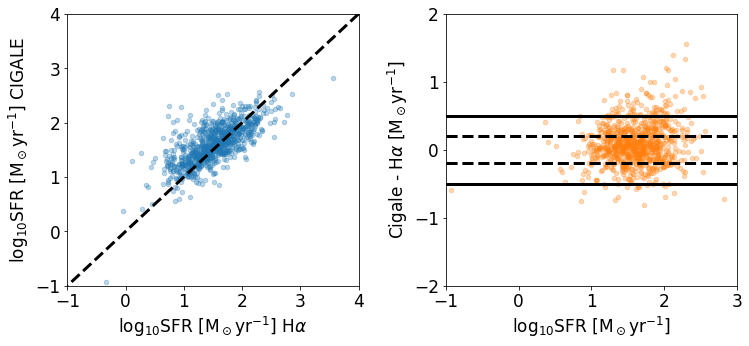

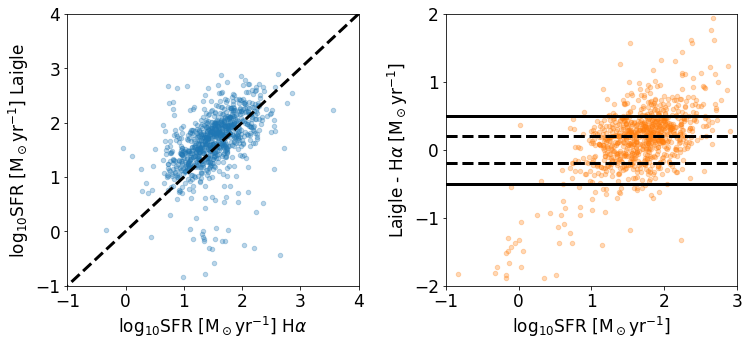

In [22]:
mass_lines = np.linspace(7, 13, 100)
sfr_lines  = np.linspace(-4, 4, 100)

fig, ((axA, axB)) = plt.subplots(figsize=(12, 5), nrows=1, ncols=2, sharey = False, sharex = False)
fig.subplots_adjust(wspace=0.3, hspace=0.0)

axA.scatter(np.log10(SFR_Ha), np.log10(continuum_fit['bayes.sfh.sfr']),
           s = 20, facecolors='C0', edgecolors='C0', alpha = 0.3)
axA.plot(sfr_lines, sfr_lines, ls = '--', lw = 3, c = 'k')
axA.set_xlim(-1, 4)
axA.set_ylim(-1, 4)
axA.set_ylabel(r'$\log_{10} \mathrm{SFR}~\mathrm{[M_\odot yr^{-1}]}$ CIGALE', fontsize = 17)
axA.set_xlabel(r'$\log_{10} \mathrm{SFR}~\mathrm{[M_\odot yr^{-1}]}$ H$\alpha$', fontsize = 17)
axA.tick_params(axis = 'both', which = 'major', labelsize = 17)

axB.scatter(np.log10(continuum_fit['bayes.sfh.sfr']), np.log10(continuum_fit['bayes.sfh.sfr'])-np.log10(SFR_Ha),
           s = 20, facecolors='C1', edgecolors='C1', alpha = 0.3)
axB.axhline(y = 0.2, lw = 3, ls = '--', c = 'k')
axB.axhline(y = -0.2, lw = 3, ls = '--', c = 'k')
axB.axhline(y = 0.5, lw = 3, ls = '-', c = 'k')
axB.axhline(y = -0.5, lw = 3, ls = '-', c = 'k')
axB.set_xlim(-1, 3)
axB.set_ylim(-2, 2)
axB.set_ylabel(r'Cigale - H$\alpha$ $\mathrm{[M_\odot yr^{-1}]}$', fontsize = 17)
axB.set_xlabel(r'$\log_{10} \mathrm{SFR}~\mathrm{[M_\odot yr^{-1}]}$', fontsize = 17)
axB.tick_params(axis = 'both', which = 'major', labelsize = 17)

#---------------------------------------------------------------------------------------------

fig, ((axA, axB)) = plt.subplots(figsize=(12, 5), nrows=1, ncols=2, sharey = False, sharex = False)
fig.subplots_adjust(wspace=0.3, hspace=0.0)

axA.scatter(np.log10(SFR_Ha), sample_z_cut['SFR_BEST'],
           s = 20, facecolors='C0', edgecolors='C0', alpha = 0.3)
axA.plot(sfr_lines, sfr_lines, ls = '--', lw = 3, c = 'k')
axA.set_xlim(-1, 4)
axA.set_ylim(-1, 4)
axA.set_ylabel(r'$\log_{10} \mathrm{SFR}~\mathrm{[M_\odot yr^{-1}]}$ Laigle', fontsize = 17)
axA.set_xlabel(r'$\log_{10} \mathrm{SFR}~\mathrm{[M_\odot yr^{-1}]}$ H$\alpha$', fontsize = 17)
axA.tick_params(axis = 'both', which = 'major', labelsize = 17)

axB.scatter(sample_z_cut['SFR_BEST'], sample_z_cut['SFR_BEST']-np.log10(SFR_Ha),
           s = 20 , facecolors='C1', edgecolors='C1', alpha = 0.3)
axB.axhline(y = 0.2, lw = 3, ls = '--', c = 'k')
axB.axhline(y = -0.2, lw = 3, ls = '--', c = 'k')
axB.axhline(y = 0.5, lw = 3, ls = '-', c = 'k')
axB.axhline(y = -0.5, lw = 3, ls = '-', c = 'k')
axB.set_xlim(-1, 3)
axB.set_ylim(-2, 2)
axB.set_ylabel(r'Laigle - H$\alpha$ $\mathrm{[M_\odot yr^{-1}]}$', fontsize = 17)
axB.set_xlabel(r'$\log_{10} \mathrm{SFR}~\mathrm{[M_\odot yr^{-1}]}$', fontsize = 17)
axB.tick_params(axis = 'both', which = 'major', labelsize = 17)

In [22]:
metal_curti_FMR_laigle = FMR(sample_z_cut['MASS_BEST'], sample_z_cut['SFR_BEST'])

metal_curti_FMR_cigale = FMR(np.log10(continuum_fit['bayes.stellar.m_star']), np.log10(continuum_fit['bayes.sfh.sfr']))

metal_hunt_FMR_cigale = FMR_hunt(np.log10(continuum_fit['bayes.stellar.m_star']), np.log10(continuum_fit['bayes.sfh.sfr']))


(array([  1.,   7.,  44., 172., 392., 577., 509., 465., 259.,  81.]),
 array([-4.30525331, -4.2115837 , -4.11791409, -4.02424448, -3.93057487,
        -3.83690526, -3.74323565, -3.64956604, -3.55589643, -3.46222682,
        -3.36855721]),
 <a list of 1 Patch objects>)

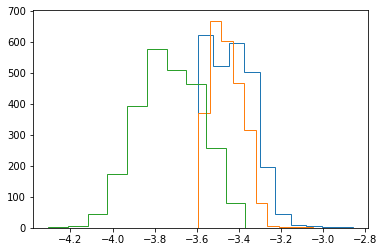

In [143]:
logU_carton_cigale = logU_carton(z = OH_to_zgas(metal_curti_FMR_cigale), z_sun = 0.0142)
logU_carton_laigle = logU_carton(z = OH_to_zgas(metal_curti_FMR_laigle), z_sun = 0.0142)

logq_mingozzi_cigale = logq_mingozzi(continuum_fit_EWHa['best.param.EW(656.3/1.0)'])
logU_mingozzi_cigale = logq_to_logU(logq_mingozzi_cigale)

plt.figure()
plt.hist(logU_carton_laigle, histtype = 'step')
plt.hist(logU_carton_cigale, histtype = 'step')
plt.hist(logU_mingozzi_cigale, histtype = 'step')

# plt.figure()
# plt.scatter(metal_curti_FMR_cigale, logU_carton_cigale)
# plt.scatter(metal_curti_FMR_laigle, logU_carton_laigle)

(array([2056.,    0.,    0.,    0.,    0.,   24.,    0.,    0.,    0.,
         428.]),
 array([-2.2 , -2.16, -2.12, -2.08, -2.04, -2.  , -1.96, -1.92, -1.88,
        -1.84, -1.8 ]),
 <a list of 10 Patch objects>)

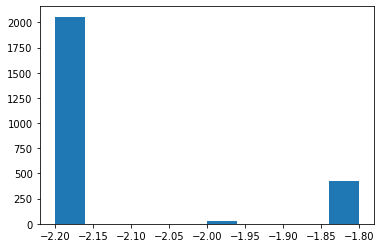

In [26]:
plt.hist(continuum_fit['best.nebular.logU'])

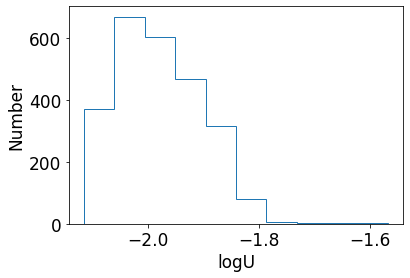

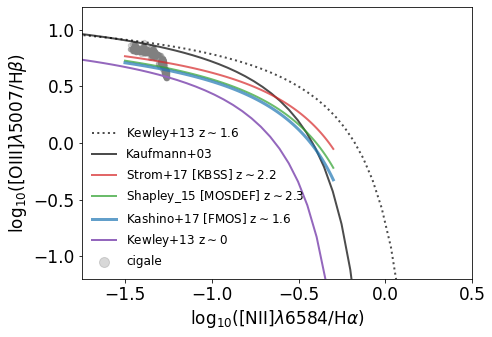

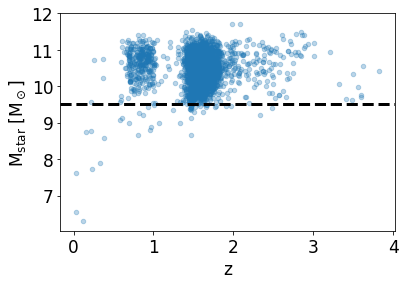

In [99]:
# plt.hist(metal_curti_FMR_cigale, histtype='step')
# plt.hist(metal_hunt_FMR_cigale, histtype='step')

# plt.hist(OH_to_zgas(metal_curti_FMR_cigale), histtype='step')
# plt.hist(OH_to_zgas_Chevallard(metal_hunt_FMR_cigale), histtype='step')


plt.hist(logU(OH_to_zgas(metal_curti_FMR_cigale)), histtype='step')
# plt.hist(logU(OH_to_zgas_Chevallard(metal_hunt_FMR_cigale)), histtype='step')
plt.xlabel('logU', fontsize =17)
plt.ylabel('Number', fontsize =17)
plt.tick_params(axis = 'both', which = 'major', labelsize = 17)
# plt.legend()

# -------------------------------------------

plt.figure(figsize=(7, 5))
plt.plot(log_NIIHa_kewl[:98], kewley13(log_NIIHa_kewl, z = 1.6)[:98], c = 'k', ls = ':', lw = 2, alpha = 0.7, label = 'Kewley+13 z$\sim1.6$ ')
plt.plot(log_NIIHa_kauf, kaufmann03(log_NIIHa_kauf), c = 'k', ls = '-', lw = 2, alpha = 0.7, label = 'Kaufmann+03')
plt.plot(logNIIHa, Strom_17(logNIIHa), c = 'C3', lw = 2, alpha = 0.7, label = 'Strom+17 [KBSS] z$\sim2.2$')
plt.plot(logNIIHa, Shapley_15(logNIIHa), c = 'C2', lw = 2, alpha = 0.7, label = 'Shapley_15 [MOSDEF] z$\sim2.3$')
plt.plot(logNIIHa, Kashino_17(logNIIHa), c = 'C0', lw = 3, alpha = 0.7, label = 'Kashino+17 [FMOS] z$\sim1.6$')
plt.plot(log_NIIHa_kewl[:90], Kewley_13(log_NIIHa_kewl)[:90], c = 'C4', ls = '-', lw = 2, label = 'Kewley+13 z$\sim0$')

ce = plt.scatter(np.log10(continuum_fit['bayes.line.NII-658.4']/continuum_fit['bayes.line.H-alpha']),
                 np.log10(continuum_fit['bayes.line.OIII-500.7']/continuum_fit['bayes.line.H-beta']),
                 s = 20, facecolors='gray', edgecolors='gray', alpha = 0.3, label = 'cigale')

plt.xlim(-1.75, 0.5)
plt.ylim(-1.2, 1.2) 
plt.xlabel(r'$\log_{10}$($\mathrm{[NII]}\lambda6584/\mathrm{H}\alpha$)', fontsize = 17)
plt.ylabel(r'$\log_{10}$($\mathrm{[OIII]}\lambda5007/\mathrm{H}\beta$)', fontsize = 17)
plt.tick_params(axis = 'both', which = 'major', labelsize = 17)
marker_size = 100
def update_prop(handle, orig):
    handle.update_from(orig)
    handle.set_sizes([marker_size])
plt.legend(frameon = False, prop = {'size': 12}, loc = 'lower left',\
           handler_map={type(ce): HandlerPathCollection(update_func=update_prop)})

# -------------------------------------------
plt.figure()
plt.scatter(continuum_fit['best.universe.redshift'],
            np.log10(continuum_fit['bayes.stellar.m_star']),
            s = 20, facecolors='C0', edgecolors='C0', alpha = 0.3)
plt.axhline(y = 9.5, lw = 3, ls = '--', c = 'k')
plt.xlabel('z', fontsize = 17)
plt.ylabel(r'M$_\mathrm{star}$ [M$_\odot$]', fontsize = 17)
plt.tick_params(axis = 'both', which = 'major', labelsize = 17)

In [182]:
# plt.scatter(continuum_fit['bayes.nebular.zgas'],
#             continuum_fit['bayes.nebular.zgas']-OH_to_zgas(metal_curti_FMR_cigale))

# plt.hist(continuum_fit['bayes.nebular.logU'])

# plt.scatter(np.log10(continuum_fit['bayes.line.NII-654.8']/continuum_fit['bayes.line.H-alpha']),
#             np.log10(continuum_fit['bayes.line.OIII-500.7']/continuum_fit['bayes.line.H-beta']))

# plt.scatter(np.log10((continuum_fit['bayes.line.SII-673.1']+continuum_fit['bayes.line.SII-671.6'])/continuum_fit['bayes.line.H-alpha']),
#             np.log10(continuum_fit['bayes.line.OIII-500.7']/continuum_fit['bayes.line.H-beta']))

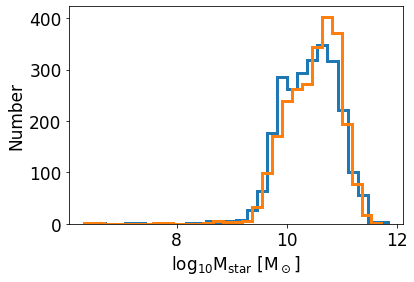

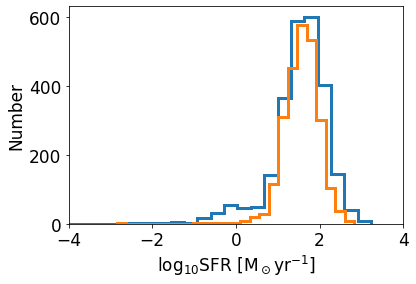

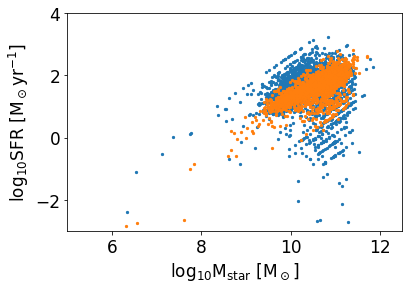

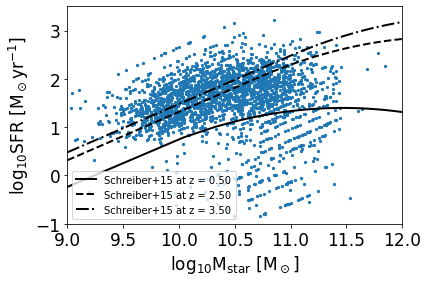

In [163]:
plt.figure()
plt.hist(sample_z_cut['MASS_BEST'], bins = 30, histtype = 'step', lw = 3)
plt.hist(np.log10(continuum_fit['bayes.stellar.m_star']), bins = 30, histtype = 'step', lw = 3)
plt.ylabel(r'Number', fontsize = 17)
plt.xlabel(r'$\log_{10} \mathrm{M_{star}}~\mathrm{[M_\odot]}$', fontsize = 17)
plt.tick_params(axis = 'both', which = 'major', labelsize = 17)
# plt.legend(frameon = False, prop = {'size': 15}, markerscale = 2 , loc = 'upper right')

plt.figure()
plt.hist(sample_z_cut['SFR_BEST'], bins = 100, histtype = 'step', lw = 3)
plt.hist(np.log10(continuum_fit['bayes.sfh.sfr']), bins = 25, histtype = 'step', lw = 3)
plt.xlim(-4, 4)
plt.ylabel(r'Number', fontsize = 17)
plt.xlabel(r'$\log_{10} \mathrm{SFR}~\mathrm{[M_\odot yr^{-1}]}$', fontsize = 17)
plt.tick_params(axis = 'both', which = 'major', labelsize = 17)
# plt.legend(frameon = False, prop = {'size': 15}, markerscale = 2 , loc = 'upper right')

plt.figure()
plt.scatter(sample_z_cut['MASS_BEST'], sample_z_cut['SFR_BEST'], s=5)
plt.scatter(np.log10(continuum_fit['bayes.stellar.m_star']), np.log10(continuum_fit['bayes.sfh.sfr']), s=5)
plt.xlim(5, 12.5)
plt.ylim(-3, 4)
plt.xlabel(r'$\log_{10} \mathrm{M_{star}}~\mathrm{[M_\odot]}$', fontsize = 17)
plt.ylabel(r'$\log_{10} \mathrm{SFR}~\mathrm{[M_\odot yr^{-1}]}$', fontsize = 17)
plt.tick_params(axis = 'both', which = 'major', labelsize = 17)

# plt.figure()
# plt.scatter(sample_z_cut['MASS_BEST'], sample_z_cut['SFR_BEST'], s=5)
# plt.scatter(np.log10(continuum_fit['best.stellar.m_star']), np.log10(continuum_fit['best.sfh.sfr']), s=5)
# plt.xlim(5, 12.5)
# plt.ylim(-3, 4)
# plt.xlabel(r'$\log_{10} \mathrm{M_{star}}~\mathrm{[M_\odot]}$', fontsize = 17)
# plt.ylabel(r'$\log_{10} \mathrm{SFR}~\mathrm{[M_\odot yr^{-1}]}$', fontsize = 17)
# plt.tick_params(axis = 'both', which = 'major', labelsize = 17)

plt.figure()
plt.scatter(sample_z_cut['MASS_BEST'], sample_z_cut['SFR_BEST'], s=5)
plt.plot(np.log10(M_star), MS(0.5,M_star), linestyle = '-', linewidth = 2.0,\
         c = 'k', label = 'Schreiber+15 at z = %.2f'%0.5)
# plt.plot(np.log10(M_star), MS(np.mean(bins['redshift']),M_star), linestyle = ':', linewidth = 2.0,\
#          c = 'k', label = 'Schreiber+15 at z = %.2f'%np.mean(bins['redshift']))
plt.plot(np.log10(M_star), MS(2.5,M_star), linestyle = '--', linewidth = 2.0,\
         c = 'k', label = 'Schreiber+15 at z = %.2f'%2.5)
plt.plot(np.log10(M_star), MS(3.5,M_star), linestyle = '-.', linewidth = 2.0,\
         c = 'k', label = 'Schreiber+15 at z = %.2f'%3.5)
plt.xlim(9, 12)
plt.ylim(-1, 3.5)
# plt.xlim(5, 12.5)
# plt.ylim(-3, 4)
plt.xlabel(r'$\log_{10} \mathrm{M_{star}}~\mathrm{[M_\odot]}$', fontsize = 17)
plt.ylabel(r'$\log_{10} \mathrm{SFR}~\mathrm{[M_\odot yr^{-1}]}$', fontsize = 17)
plt.tick_params(axis = 'both', which = 'major', labelsize = 17)
plt.legend()

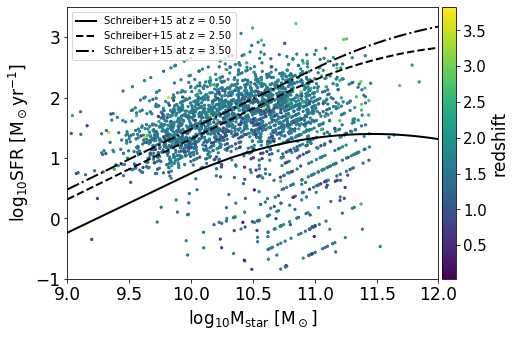

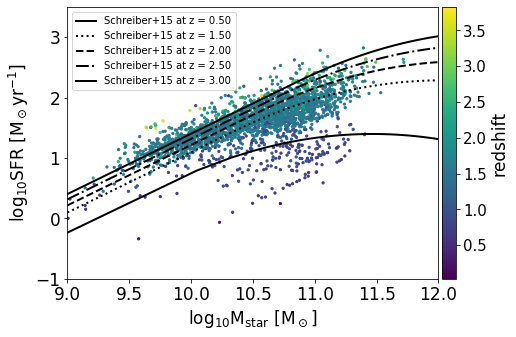

In [29]:
# data_3           = Table.read('/Users/lam/Desktop/MOONS/MOONS_2021/FILES_redshift_bins/'
#                              'COSMOS_FMOS_MOONS_2021_zCUT_BPT_0.00-1.00.fits', format='fits')
# continuum_fit_3 = Table.read('/Users/lam/Desktop/MOONS/MOONS_2021/cigale_runs_2021/out/results.fits', format = 'fits')


# continuum_fit_test = continuum_fit[np.where((continuum_fit['best.universe.redshift'] > 0.0)&
#                                        (continuum_fit['best.universe.redshift'] < 1.0))]

# data_3           = Table.read('/Users/lam/Desktop/MOONS/MOONS_2021/FILES_redshift_bins/'
#                              'COSMOS_FMOS_MOONS_2021_zCUT_BPT_1.00-3.83.fits', format='fits')
# continuum_fit_3 = Table.read('/Users/lam/Desktop/MOONS/MOONS_2021/cigale_runs_2021/out/results.fits', format = 'fits')


# continuum_fit_test = continuum_fit[np.where((continuum_fit['best.universe.redshift'] > 1.0)&
#                                        (continuum_fit['best.universe.redshift'] < 4.0))]

plt.figure(figsize=(7,5))
img = plt.scatter(sample_z_cut['MASS_BEST'], sample_z_cut['SFR_BEST'],
            s=5, c =  continuum_fit['best.universe.redshift'])
plt.plot(np.log10(M_star), MS(0.5,M_star), linestyle = '-', linewidth = 2.0,\
         c = 'k', label = 'Schreiber+15 at z = %.2f'%0.5)
# plt.plot(np.log10(M_star), MS(np.mean(bins['redshift']),M_star), linestyle = ':', linewidth = 2.0,\
#          c = 'k', label = 'Schreiber+15 at z = %.2f'%np.mean(bins['redshift']))
plt.plot(np.log10(M_star), MS(2.5,M_star), linestyle = '--', linewidth = 2.0,\
         c = 'k', label = 'Schreiber+15 at z = %.2f'%2.5)
plt.plot(np.log10(M_star), MS(3.5,M_star), linestyle = '-.', linewidth = 2.0,\
         c = 'k', label = 'Schreiber+15 at z = %.2f'%3.5)
cd = plt.colorbar(img, fraction = 0.04, pad = 0.01)
cd.set_label(label = r'redshift', size = 17)
cd.ax.tick_params(labelsize = 15)
plt.xlim(9, 12)
plt.ylim(-1, 3.5)
# plt.xlim(5, 12.5)
# plt.ylim(-3, 4)
# plt.colorbar()
plt.xlabel(r'$\log_{10} \mathrm{M_{star}}~\mathrm{[M_\odot]}$', fontsize = 17)
plt.ylabel(r'$\log_{10} \mathrm{SFR}~\mathrm{[M_\odot yr^{-1}]}$', fontsize = 17)
plt.tick_params(axis = 'both', which = 'major', labelsize = 17)
plt.legend()

plt.figure(figsize=(7,5))
# plt.scatter(np.log10(continuum_fit_test['bayes.stellar.m_star']), np.log10(continuum_fit_test['bayes.sfh.sfr']),
#             s=5, c = continuum_fit_test['best.universe.redshift'])
img = plt.scatter(np.log10(continuum_fit['bayes.stellar.m_star']), np.log10(continuum_fit['bayes.sfh.sfr']),
            s=5, c = continuum_fit['best.universe.redshift'])
plt.plot(np.log10(M_star), MS(0.5,M_star), linestyle = '-', linewidth = 2.0,\
         c = 'k', label = 'Schreiber+15 at z = %.2f'%0.5)
plt.plot(np.log10(M_star), MS(1.5,M_star), linestyle = ':', linewidth = 2.0,\
         c = 'k', label = 'Schreiber+15 at z = %.2f'%1.5)
plt.plot(np.log10(M_star), MS(2.0,M_star), linestyle = '--', linewidth = 2.0,\
         c = 'k', label = 'Schreiber+15 at z = %.2f'%2.0)
plt.plot(np.log10(M_star), MS(2.5,M_star), linestyle = '-.', linewidth = 2.0,\
         c = 'k', label = 'Schreiber+15 at z = %.2f'%2.5)
plt.plot(np.log10(M_star), MS(3.0,M_star), linestyle = '-', linewidth = 2.0,\
         c = 'k', label = 'Schreiber+15 at z = %.2f'%3.0)
cd = plt.colorbar(img, fraction = 0.04, pad = 0.01)
cd.set_label(label = r'redshift', size = 17)
cd.ax.tick_params(labelsize = 15)
plt.xlim(9, 12)
plt.ylim(-1, 3.5)
# plt.colorbar()
plt.xlabel(r'$\log_{10} \mathrm{M_{star}}~\mathrm{[M_\odot]}$', fontsize = 17)
plt.ylabel(r'$\log_{10} \mathrm{SFR}~\mathrm{[M_\odot yr^{-1}]}$', fontsize = 17)
plt.tick_params(axis = 'both', which = 'major', labelsize = 17)
plt.legend(loc='best')

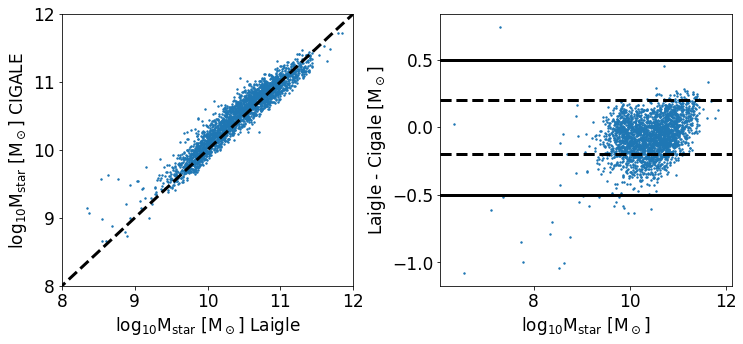

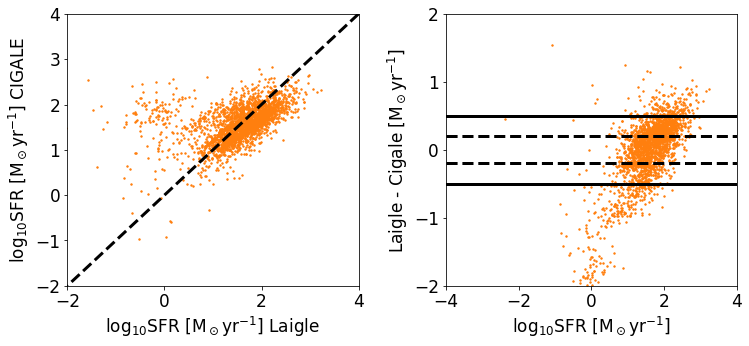

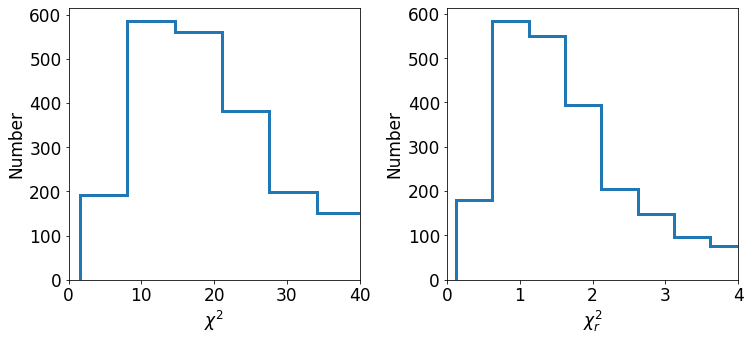

In [23]:
mass_lines = np.linspace(7, 13, 100)
sfr_lines  = np.linspace(-4, 4, 100)

fig, ((axA, axB)) = plt.subplots(figsize=(12, 5), nrows=1, ncols=2, sharey = False, sharex = False)
fig.subplots_adjust(wspace=0.3, hspace=0.0)

axA.scatter(sample_z_cut['MASS_BEST'], np.log10(continuum_fit['bayes.stellar.m_star']),
           s = 2, c = 'C0')
axA.plot(mass_lines, mass_lines, ls = '--', lw = 3, c = 'k')
axA.set_xlim(8, 12)
axA.set_ylim(8, 12)
axA.set_ylabel(r'$\log_{10} \mathrm{M_{star}}~\mathrm{[M_\odot]}$ CIGALE', fontsize = 17)
axA.set_xlabel(r'$\log_{10} \mathrm{M_{star}}~\mathrm{[M_\odot]}$ Laigle', fontsize = 17)
axA.tick_params(axis = 'both', which = 'major', labelsize = 17)

axB.scatter(sample_z_cut['MASS_BEST'], sample_z_cut['MASS_BEST']-np.log10(continuum_fit['bayes.stellar.m_star']),
           s = 2, c = 'C0')
axB.axhline(y = 0.2, lw = 3, ls = '--', c = 'k')
axB.axhline(y = -0.2, lw = 3, ls = '--', c = 'k')
axB.axhline(y = 0.5, lw = 3, ls = '-', c = 'k')
axB.axhline(y = -0.5, lw = 3, ls = '-', c = 'k')
axB.set_ylabel(r'Laigle - Cigale $\mathrm{[M_\odot]}$', fontsize = 17)
axB.set_xlabel(r'$\log_{10} \mathrm{M_{star}}~\mathrm{[M_\odot]}$', fontsize = 17)
axB.tick_params(axis = 'both', which = 'major', labelsize = 17)

#---------------------------------------------------------------------------

fig, ((axA, axB)) = plt.subplots(figsize=(12, 5), nrows=1, ncols=2, sharey = False, sharex = False)
fig.subplots_adjust(wspace=0.3, hspace=0.0)

axA.scatter(sample_z_cut['SFR_BEST'], np.log10(continuum_fit['bayes.sfh.sfr']),
           s = 2, c = 'C1')
axA.plot(sfr_lines, sfr_lines, ls = '--', lw = 3, c = 'k')
axA.set_xlim(-2, 4)
axA.set_ylim(-2, 4)
axA.set_ylabel(r'$\log_{10} \mathrm{SFR}~\mathrm{[M_\odot yr^{-1}]}$ CIGALE', fontsize = 17)
axA.set_xlabel(r'$\log_{10} \mathrm{SFR}~\mathrm{[M_\odot yr^{-1}]}$ Laigle', fontsize = 17)
axA.tick_params(axis = 'both', which = 'major', labelsize = 17)

axB.scatter(sample_z_cut['SFR_BEST'], sample_z_cut['SFR_BEST']-np.log10(continuum_fit['bayes.sfh.sfr']),
           s = 2, c = 'C1')
axB.axhline(y = 0.2, lw = 3, ls = '--', c = 'k')
axB.axhline(y = -0.2, lw = 3, ls = '--', c = 'k')
axB.axhline(y = 0.5, lw = 3, ls = '-', c = 'k')
axB.axhline(y = -0.5, lw = 3, ls = '-', c = 'k')
axB.set_xlim(-4, 4)
axB.set_ylim(-2, 2)
axB.set_ylabel(r'Laigle - Cigale $\mathrm{[M_\odot yr^{-1}]}$', fontsize = 17)
axB.set_xlabel(r'$\log_{10} \mathrm{SFR}~\mathrm{[M_\odot yr^{-1}]}$', fontsize = 17)
axB.tick_params(axis = 'both', which = 'major', labelsize = 17)

#---------------------------------------------------------------------------------

fig, ((axA, axB)) = plt.subplots(figsize=(12, 5), nrows=1, ncols=2, sharey = False, sharex = False)
fig.subplots_adjust(wspace=0.3, hspace=0.0)

axA.hist(continuum_fit['best.chi_square'], bins = 45, lw = 3, histtype = 'step')
axA.set_xlim(0, 40)
axA.set_ylabel(r'Number', fontsize = 17)
axA.set_xlabel(r'$\chi^2$', fontsize = 17)
axA.tick_params(axis = 'both', which = 'major', labelsize = 17)

axB.hist(continuum_fit['best.reduced_chi_square'], bins = 45, lw = 3, histtype = 'step')
axB.set_xlim(0, 4)
axB.set_ylabel(r'Number', fontsize = 17)
axB.set_xlabel(r'$\chi_r^2$', fontsize = 17)
axB.tick_params(axis = 'both', which = 'major', labelsize = 17)

#---------------------------------------------------------------------------------



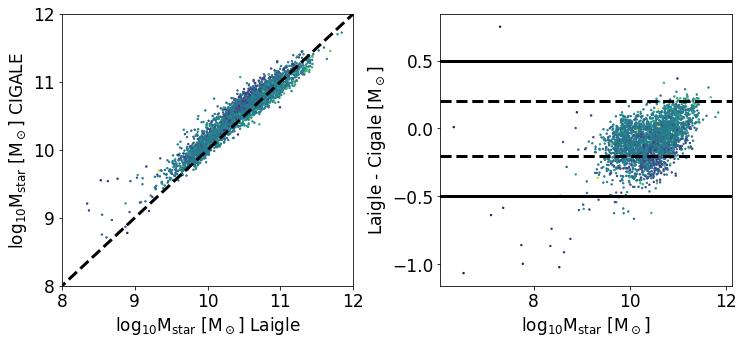

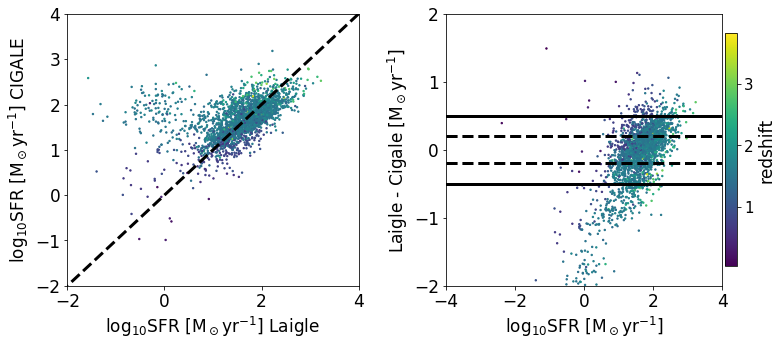

In [30]:
fig, ((axA, axB)) = plt.subplots(figsize=(12, 5), nrows=1, ncols=2, sharey = False, sharex = False)
fig.subplots_adjust(wspace=0.3, hspace=0.0)

img = axA.scatter(sample_z_cut['MASS_BEST'], np.log10(continuum_fit['bayes.stellar.m_star']),
           s = 2, c = sample_z_cut['PHOTOZ_Laigle'])
# cd = plt.colorbar(img, fraction = 0.04, pad = 0.01)
# cd.set_label(label = r'redshift', size = 17)
axA.plot(mass_lines, mass_lines, ls = '--', lw = 3, c = 'k')
axA.set_xlim(8, 12)
axA.set_ylim(8, 12)
axA.set_ylabel(r'$\log_{10} \mathrm{M_{star}}~\mathrm{[M_\odot]}$ CIGALE', fontsize = 17)
axA.set_xlabel(r'$\log_{10} \mathrm{M_{star}}~\mathrm{[M_\odot]}$ Laigle', fontsize = 17)
axA.tick_params(axis = 'both', which = 'major', labelsize = 17)

axB.scatter(sample_z_cut['MASS_BEST'], sample_z_cut['MASS_BEST']-np.log10(continuum_fit['bayes.stellar.m_star']),
           s = 2, c = sample_z_cut['PHOTOZ_Laigle'])
axB.axhline(y = 0.2, lw = 3, ls = '--', c = 'k')
axB.axhline(y = -0.2, lw = 3, ls = '--', c = 'k')
axB.axhline(y = 0.5, lw = 3, ls = '-', c = 'k')
axB.axhline(y = -0.5, lw = 3, ls = '-', c = 'k')
axB.set_ylabel(r'Laigle - Cigale $\mathrm{[M_\odot]}$', fontsize = 17)
axB.set_xlabel(r'$\log_{10} \mathrm{M_{star}}~\mathrm{[M_\odot]}$', fontsize = 17)
axB.tick_params(axis = 'both', which = 'major', labelsize = 17)

#---------------------------------------------------------------------------

fig, ((axA, axB)) = plt.subplots(figsize=(12, 5), nrows=1, ncols=2, sharey = False, sharex = False)
fig.subplots_adjust(wspace=0.3, hspace=0.0)

img = axA.scatter(sample_z_cut['SFR_BEST'], np.log10(continuum_fit['bayes.sfh.sfr']),
           s = 2, c = sample_z_cut['PHOTOZ_Laigle'])
# cd = plt.colorbar(img, fraction = 0.04, pad = 0.01)
# cd.set_label(label = r'redshift', size = 17)
# cd.ax.tick_params(labelsize = 15)
axA.plot(sfr_lines, sfr_lines, ls = '--', lw = 3, c = 'k')
axA.set_xlim(-2, 4)
axA.set_ylim(-2, 4)
axA.set_ylabel(r'$\log_{10} \mathrm{SFR}~\mathrm{[M_\odot yr^{-1}]}$ CIGALE', fontsize = 17)
axA.set_xlabel(r'$\log_{10} \mathrm{SFR}~\mathrm{[M_\odot yr^{-1}]}$ Laigle', fontsize = 17)
axA.tick_params(axis = 'both', which = 'major', labelsize = 17)

img = axB.scatter(sample_z_cut['SFR_BEST'], sample_z_cut['SFR_BEST']-np.log10(continuum_fit['bayes.sfh.sfr']),
           s = 2, c = sample_z_cut['PHOTOZ_Laigle'])
cd = plt.colorbar(img, fraction = 0.04, pad = 0.01)
cd.set_label(label = r'redshift', size = 17)
cd.ax.tick_params(labelsize = 15)
axB.axhline(y = 0.2, lw = 3, ls = '--', c = 'k')
axB.axhline(y = -0.2, lw = 3, ls = '--', c = 'k')
axB.axhline(y = 0.5, lw = 3, ls = '-', c = 'k')
axB.axhline(y = -0.5, lw = 3, ls = '-', c = 'k')
axB.set_xlim(-4, 4)
axB.set_ylim(-2, 2)
axB.set_ylabel(r'Laigle - Cigale $\mathrm{[M_\odot yr^{-1}]}$', fontsize = 17)
axB.set_xlabel(r'$\log_{10} \mathrm{SFR}~\mathrm{[M_\odot yr^{-1}]}$', fontsize = 17)
axB.tick_params(axis = 'both', which = 'major', labelsize = 17)

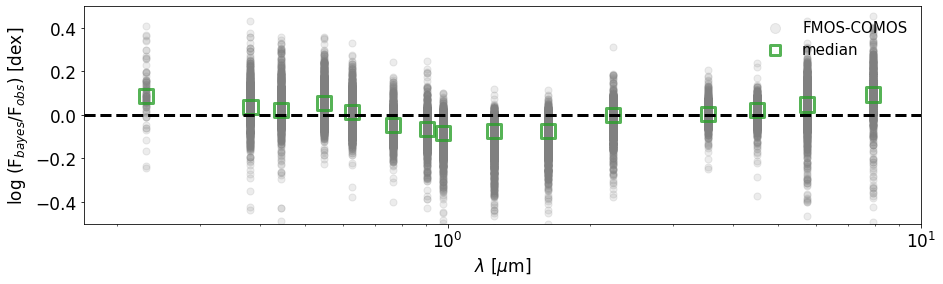

In [166]:
plt.figure(figsize = (15,4))
for i in range(len(bands_nolines)):
    
    data_high_snr   = data[data[bands_nolines[i]]/data[bands_nolines[i]+'_err'] > 3]
    
    continuum_fit_high_snr = continuum_fit[np.where(data[bands_nolines[i]]/data[bands_nolines[i]+'_err'] > 3)]
    
    dif_best_obs_help_data = np.log10(continuum_fit_high_snr['bayes.'+bands_nolines[i]]) - np.log10(data_high_snr[bands_nolines[i]])
    
    x_help_data = np.full(len(dif_best_obs_help_data), wl_phot[i])
    
    ce =  plt.scatter(x_help_data, dif_best_obs_help_data, c = 'gray', marker = 'o', s = 50, alpha = 0.15)
    
    plt.scatter(wl_phot[i], np.nanmedian(dif_best_obs_help_data[np.isfinite(dif_best_obs_help_data)]), s = 200, lw = 3, marker = 's', alpha = 0.8, facecolors='none', edgecolors='C2')

plt.xlabel('$\lambda$ [$\mu$m]', fontsize = 17)
plt.ylabel('log (F$_{bayes}$/F$_{obs}$) [dex]', fontsize = 17)
plt.tick_params(axis = 'both', which = 'major', labelsize = 17)
plt.ylim(-0.5, 0.5)
plt.xlim(0.17, 10)
plt.xscale('log')
# plt.yscale('symlog')
marker_size = 100
def update_prop(handle, orig):
    handle.update_from(orig)
    handle.set_sizes([marker_size])
plt.legend(['FMOS-COMOS', 'median'], frameon = False, prop = {'size': 15}, loc = 'upper right',\
           handler_map={type(ce): HandlerPathCollection(update_func=update_prop)})    
plt.axhline(y = 0, ls = '--', lw = 3, c = 'k')

# plt.savefig('/Users/lam/Desktop/data_fit_cf00.png', dpi = 300, bbox_inches = 'tight')

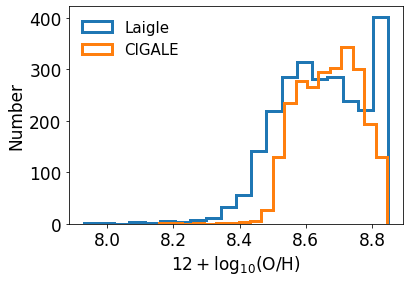

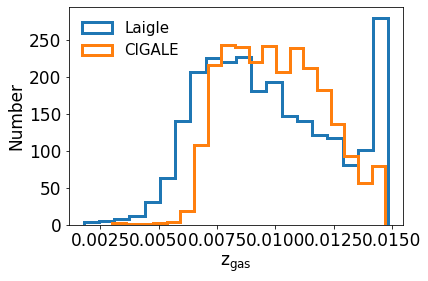

In [43]:
plt.figure()
plt.hist(metal_curti_FMR_laigle+0.07, bins = 20, histtype = 'step', lw = 3, label = 'Laigle')
plt.hist(metal_curti_FMR_cigale+0.07, bins = 20, histtype = 'step', lw = 3, label = 'CIGALE')
plt.ylabel(r'Number', fontsize = 17)
plt.xlabel(r'$12+\log_{10}(\mathrm{O/H})$', fontsize = 17)
plt.tick_params(axis = 'both', which = 'major', labelsize = 17)
plt.legend(frameon = False, prop = {'size': 15}, markerscale = 2 , loc = 'upper left')

plt.figure()
plt.hist(OH_to_zgas(metal_curti_FMR_laigle), bins = 20, histtype = 'step', lw = 3, label = 'Laigle')
plt.hist(OH_to_zgas(metal_curti_FMR_cigale), bins = 20, histtype = 'step', lw = 3, label = 'CIGALE')
plt.ylabel(r'Number', fontsize = 17)
plt.xlabel(r'$\mathrm{z_{gas}}$', fontsize = 17)
plt.tick_params(axis = 'both', which = 'major', labelsize = 17)
plt.legend(frameon = False, prop = {'size': 15}, markerscale = 2 , loc = 'upper left')

# Samples to be fitted with CIGALE divided by metallicity

In [128]:
data          = Table.read('/Users/lam/Desktop/MOONS/MOONS_2021/COSMOS_FMOS_MOONS_2021_zCUT_BPT.fits', format='fits')
continuum_fit = Table.read('/Users/lam/Desktop/MOONS/MOONS_2021/cigale_runs_2021/run_continuum_C00_new_final_8/results.fits', format = 'fits')
# Deleting fake galaxy (it will be added to each file after)
continuum_fit = continuum_fit[:-1]
data          = data[:-1]

metal_curti_FMR_cigale = FMR(np.log10(continuum_fit['bayes.stellar.m_star']),
                             np.log10(continuum_fit['bayes.sfh.sfr']))

metallicities = OH_to_zgas(metal_curti_FMR_cigale)


metal_1 = data[np.where(metallicities < 0.008)]
metal_2 = data[np.where((metallicities >= 0.008)&(metallicities < 0.009))]
metal_3 = data[np.where((metallicities >= 0.009)&(metallicities < 0.011))]
metal_4 = data[np.where((metallicities >= 0.011)&(metallicities < 0.013))]
metal_5 = data[np.where(metallicities >= 0.013)]

print('Number of objects')
print(len(metal_1));print(len(metal_2));print(len(metal_3));print(len(metal_4));print(len(metal_5))

os.system('rm -rf /Users/lam/Desktop/MOONS/MOONS_2021/metal_bins/')
os.system('mkdir /Users/lam/Desktop/MOONS/MOONS_2021/metal_bins/')

lines = ['Ly-alpha',
         'HeII-164.0',
         'OIII-166.5',
         'CIII-190.9',
         'MgII-279.8',
         'OII-372.7',
         'H-9',
         'NeIII-386.9',
         'HeI-388.9',
         'H-8',
         'NeIII-396.8',
         'H-epsilon',
         'H-delta',
         'H-gamma',
         'OIII-436.3',
         'H-beta',
         'OIII-495.9',
         'OIII-500.7',
         'HeI-587.6',
         'OI-630.0',
         'NII-654.8',
         'H-alpha',
         'NII-658.4',
         'SII-671.6',
         'SII-673.1', 
         'ArIII-713.6']

# Fake galaxy is filtered to be added
fake  = Table.read('/Users/lam/Desktop/MOONS/MOONS_2021/COSMOS_FMOS_MOONS_2021_zCUT.fits', format  = 'fits')
fake  = fake[fake['id'] == 993206]

for i in range(len(lines)):
    fake['line.'+lines[i]]        = 8.271998799359089e-19
    fake['line.'+lines[i]+'_err'] = 8.271998799359089e-21

# Adding fake galaxy
metal_1 = vstack([metal_1, fake])    
metal_1['id'][:][-1] = -999999    # This is the fake galaxy ID 

metal_2 = vstack([metal_2, fake])    
metal_2['id'][:][-1] = -999999    # This is the fake galaxy ID 

metal_3 = vstack([metal_3, fake])    
metal_3['id'][:][-1] = -999999    # This is the fake galaxy ID 

metal_4 = vstack([metal_4, fake])    
metal_4['id'][:][-1] = -999999    # This is the fake galaxy ID 

metal_5 = vstack([metal_5, fake])    
metal_5['id'][:][-1] = -999999    # This is the fake galaxy ID 

metal_1.write('/Users/lam/Desktop/MOONS/MOONS_2021/metal_bins/COSMOS_FMOS_MOONS_2021_zCUT_BPT_metal_1.fits', format='fits')
metal_2.write('/Users/lam/Desktop/MOONS/MOONS_2021/metal_bins/COSMOS_FMOS_MOONS_2021_zCUT_BPT_metal_2.fits', format='fits')
metal_3.write('/Users/lam/Desktop/MOONS/MOONS_2021/metal_bins/COSMOS_FMOS_MOONS_2021_zCUT_BPT_metal_3.fits', format='fits')
metal_4.write('/Users/lam/Desktop/MOONS/MOONS_2021/metal_bins/COSMOS_FMOS_MOONS_2021_zCUT_BPT_metal_4.fits', format='fits')
metal_5.write('/Users/lam/Desktop/MOONS/MOONS_2021/metal_bins/COSMOS_FMOS_MOONS_2021_zCUT_BPT_metal_5.fits', format='fits')


Number of objects
490
403
773
622
220


In [26]:
# np.min(metallicities)
# print(np.mean(metallicities[metallicities < 0.008]))
# plt.hist(metallicities[metallicities < 0.008])
# print(logU(0.007))
# print(logU(0.008))

# print(np.mean(metallicities[(metallicities >= 0.008)&(metallicities < 0.009)]))
# plt.hist(metallicities[(metallicities >= 0.008)&(metallicities < 0.009)])
# print(logU(0.008))
# print(logU(0.009))

# print(np.mean(metallicities[(metallicities >= 0.009)&(metallicities < 0.011)]))
# plt.hist(metallicities[(metallicities >= 0.009)&(metallicities < 0.011)])

# print(np.mean(metallicities[(metallicities >= 0.011)&(metallicities < 0.013)]))
# plt.hist(metallicities[(metallicities >= 0.011)&(metallicities < 0.013)])

# print(np.mean(metallicities[metallicities > 0.013]))
# plt.hist(metallicities[metallicities > 0.013])
# print(logU(0.011))
# print(logU(0.014))

In [ ]:
# To get column names ready for CIGALE file
# print (', '.join(data.columns))

# Analysis per bin

min = 0.03
max = 3.83
mean = 1.54


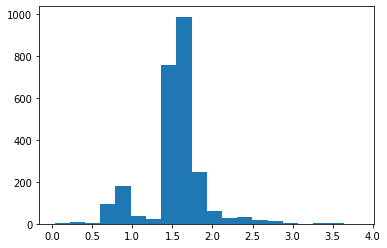

In [1317]:
plt.hist(data['redshift'], bins = 20)
print('min = %.2f'%(data['redshift'].min()))
print('max = %.2f'%(data['redshift'].max()))
print('mean = %.2f'%(data['redshift'].mean()))

In [300]:
# Run for eahc bin

bin_1           = Table.read('/Users/lam/Desktop/MOONS/MOONS_2021/FILES_redshift_bins/'
                             'COSMOS_FMOS_MOONS_2021_zCUT_BPT_0.02-0.52.fits', format='fits')
bin_2           = Table.read('/Users/lam/Desktop/MOONS/MOONS_2021/FILES_redshift_bins/'
                             'COSMOS_FMOS_MOONS_2021_zCUT_BPT_0.52-1.02.fits', format='fits')
bin_2           =  bin_2[:-1]

bin_3           = Table.read('/Users/lam/Desktop/MOONS/MOONS_2021/FILES_redshift_bins/'
                             'COSMOS_FMOS_MOONS_2021_zCUT_BPT_1.02-1.52.fits', format='fits')
bin_4           = Table.read('/Users/lam/Desktop/MOONS/MOONS_2021/FILES_redshift_bins/'
                             'COSMOS_FMOS_MOONS_2021_zCUT_BPT_1.52-2.02.fits', format='fits')
bin_5           = Table.read('/Users/lam/Desktop/MOONS/MOONS_2021/FILES_redshift_bins/'
                             'COSMOS_FMOS_MOONS_2021_zCUT_BPT_2.02-2.52.fits', format='fits')

data_1           = Table.read('/Users/lam/Desktop/MOONS/MOONS_2021/FILES_redshift_bins/'
                             'COSMOS_FMOS_MOONS_2021_zCUT_BPT_0.02-0.52_All-info_zCUT.fits', format='fits')
data_2           = Table.read('/Users/lam/Desktop/MOONS/MOONS_2021/FILES_redshift_bins/'
                             'COSMOS_FMOS_MOONS_2021_zCUT_BPT_0.52-1.02_All-info_zCUT.fits', format='fits')
data_3           = Table.read('/Users/lam/Desktop/MOONS/MOONS_2021/FILES_redshift_bins/'
                             'COSMOS_FMOS_MOONS_2021_zCUT_BPT_1.02-1.52_All-info_zCUT.fits', format='fits')
data_4           = Table.read('/Users/lam/Desktop/MOONS/MOONS_2021/FILES_redshift_bins/'
                             'COSMOS_FMOS_MOONS_2021_zCUT_BPT_1.52-2.02_All-info_zCUT.fits', format='fits')
data_5           = Table.read('/Users/lam/Desktop/MOONS/MOONS_2021/FILES_redshift_bins/'
                             'COSMOS_FMOS_MOONS_2021_zCUT_BPT_2.02-2.52_All-info_zCUT.fits', format='fits')

continuum_fit_1 = Table.read('/Users/lam/Desktop/MOONS/MOONS_2021/cigale_runs_2021/'
                             'RUN_per_bin/bin_1/results.fits', format = 'fits')
continuum_fit_2 = Table.read('/Users/lam/Desktop/MOONS/MOONS_2021/cigale_runs_2021/'
                             'RUN_per_bin/bin_2/results.fits', format = 'fits')
continuum_fit_2 =  continuum_fit_2[:-1]
continuum_fit_3 = Table.read('/Users/lam/Desktop/MOONS/MOONS_2021/cigale_runs_2021/'
                             'RUN_per_bin/bin_3/results.fits', format = 'fits')
# continuum_fit_4 = Table.read('/Users/lam/Desktop/MOONS/MOONS_2021/cigale_runs_2021/'
#                              'RUN_per_bin/out/results.fits', format = 'fits')
continuum_fit_4 = Table.read('/Users/lam/Desktop/MOONS/MOONS_2021/cigale_runs_2021/'
                             'RUN_per_bin/bin_4/results.fits', format = 'fits')
continuum_fit_5 = Table.read('/Users/lam/Desktop/MOONS/MOONS_2021/cigale_runs_2021/'
                             'RUN_per_bin/bin_5/results.fits', format = 'fits')


In [280]:
# def delayed(t, tau):
#     return((t/tau**2)*np.exp(-t/tau))

# t = np.linspace(0, 13000, 500)

# # plt.plot(t, delayed(t,1000))
# # plt.plot(t, delayed(t,2000))
# plt.plot(t, delayed(t,1000))
# plt.plot(t, delayed(t,2000))
# plt.plot(t, delayed(t,3200))

# plt.plot(t, delayed(t,4000))
# plt.plot(t, delayed(t,5000))

# # plt.plot(t, delayed(t,7000))
# # plt.plot(t, delayed(t,10000))

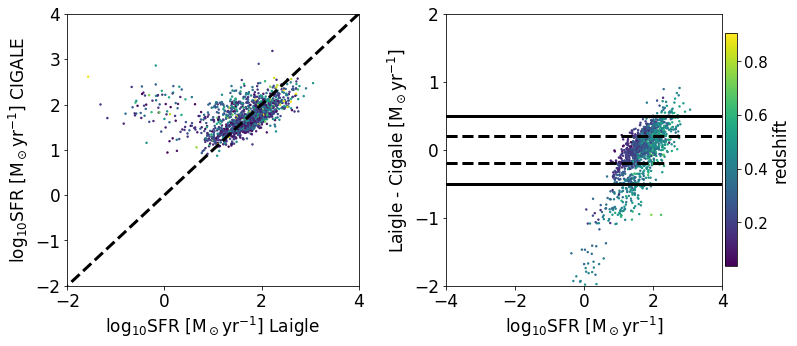

In [281]:
fig, ((axA, axB)) = plt.subplots(figsize=(12, 5), nrows=1, ncols=2, sharey = False, sharex = False)
fig.subplots_adjust(wspace=0.3, hspace=0.0)

img = axA.scatter(data_4['SFR_BEST'], np.log10(continuum_fit_4['bayes.sfh.sfr']),
           s = 2, c = data_4['PHOTOZ_Laigle'])
axA.plot(sfr_lines, sfr_lines, ls = '--', lw = 3, c = 'k')
axA.set_xlim(-2, 4)
axA.set_ylim(-2, 4)
axA.set_ylabel(r'$\log_{10} \mathrm{SFR}~\mathrm{[M_\odot yr^{-1}]}$ CIGALE', fontsize = 17)
axA.set_xlabel(r'$\log_{10} \mathrm{SFR}~\mathrm{[M_\odot yr^{-1}]}$ Laigle', fontsize = 17)
axA.tick_params(axis = 'both', which = 'major', labelsize = 17)

img = axB.scatter(data_4['SFR_BEST'], data_4['SFR_BEST']-np.log10(continuum_fit_4['bayes.sfh.sfr']),
           s = 2, c = continuum_fit_4['bayes.attenuation.E_BVs'])
cd = plt.colorbar(img, fraction = 0.04, pad = 0.01)
cd.set_label(label = r'redshift', size = 17)
cd.ax.tick_params(labelsize = 15)
axB.axhline(y = 0.2, lw = 3, ls = '--', c = 'k')
axB.axhline(y = -0.2, lw = 3, ls = '--', c = 'k')
axB.axhline(y = 0.5, lw = 3, ls = '-', c = 'k')
axB.axhline(y = -0.5, lw = 3, ls = '-', c = 'k')
axB.set_xlim(-4, 4)
axB.set_ylim(-2, 2)
axB.set_ylabel(r'Laigle - Cigale $\mathrm{[M_\odot yr^{-1}]}$', fontsize = 17)
axB.set_xlabel(r'$\log_{10} \mathrm{SFR}~\mathrm{[M_\odot yr^{-1}]}$', fontsize = 17)
axB.tick_params(axis = 'both', which = 'major', labelsize = 17)

In [301]:
bins            = vstack([bin_1, bin_2, bin_3, bin_4, bin_5])
data_sets       = vstack([data_1, data_2, data_3, data_4, data_5])
continuum_fits  = vstack([continuum_fit_1, continuum_fit_2, continuum_fit_3, continuum_fit_4, continuum_fit_5])

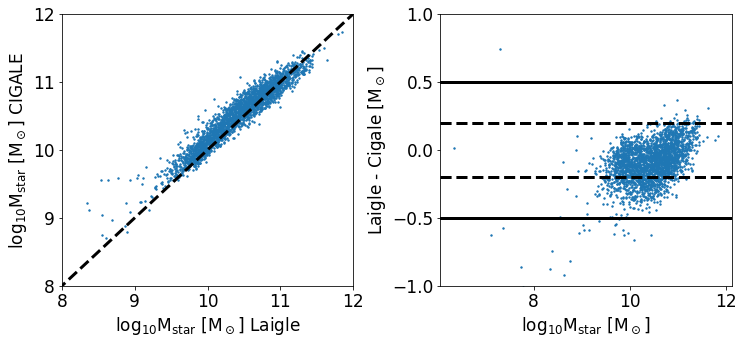

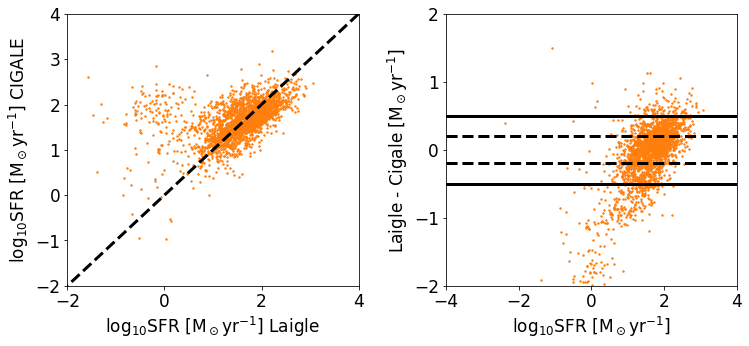

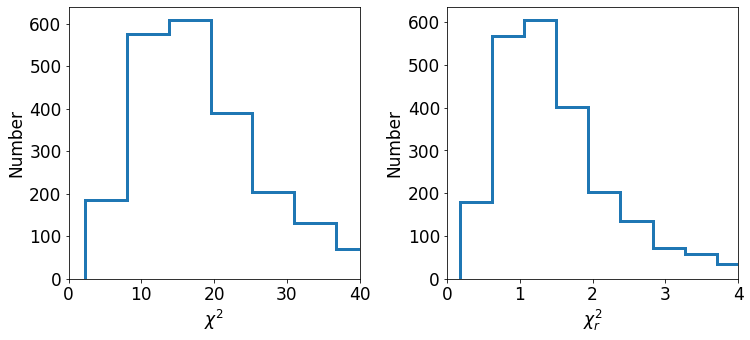

In [283]:
mass_lines = np.linspace(7, 13, 100)
sfr_lines  = np.linspace(-4, 4, 100)

fig, ((axA, axB)) = plt.subplots(figsize=(12, 5), nrows=1, ncols=2, sharey = False, sharex = False)
fig.subplots_adjust(wspace=0.3, hspace=0.0)

axA.scatter(data_sets['MASS_BEST'], np.log10(continuum_fits['bayes.stellar.m_star']),
           s = 2, c = 'C0')
axA.plot(mass_lines, mass_lines, ls = '--', lw = 3, c = 'k')
axA.set_xlim(8, 12)
axA.set_ylim(8, 12)
axA.set_ylabel(r'$\log_{10} \mathrm{M_{star}}~\mathrm{[M_\odot]}$ CIGALE', fontsize = 17)
axA.set_xlabel(r'$\log_{10} \mathrm{M_{star}}~\mathrm{[M_\odot]}$ Laigle', fontsize = 17)
axA.tick_params(axis = 'both', which = 'major', labelsize = 17)

axB.scatter(data_sets['MASS_BEST'], data_sets['MASS_BEST']-np.log10(continuum_fits['bayes.stellar.m_star']),
           s = 2, c = 'C0')
axB.axhline(y = 0.2, lw = 3, ls = '--', c = 'k')
axB.axhline(y = -0.2, lw = 3, ls = '--', c = 'k')
axB.axhline(y = 0.5, lw = 3, ls = '-', c = 'k')
axB.axhline(y = -0.5, lw = 3, ls = '-', c = 'k')
axB.set_ylim(-1, 1)
axB.set_ylabel(r'Laigle - Cigale $\mathrm{[M_\odot]}$', fontsize = 17)
axB.set_xlabel(r'$\log_{10} \mathrm{M_{star}}~\mathrm{[M_\odot]}$', fontsize = 17)
axB.tick_params(axis = 'both', which = 'major', labelsize = 17)

#---------------------------------------------------------------------------

fig, ((axA, axB)) = plt.subplots(figsize=(12, 5), nrows=1, ncols=2, sharey = False, sharex = False)
fig.subplots_adjust(wspace=0.3, hspace=0.0)

axA.scatter(data_sets['SFR_BEST'], np.log10(continuum_fits['bayes.sfh.sfr']),
           s = 2, c = 'C1')
axA.plot(sfr_lines, sfr_lines, ls = '--', lw = 3, c = 'k')
axA.set_xlim(-2, 4)
axA.set_ylim(-2, 4)
axA.set_ylabel(r'$\log_{10} \mathrm{SFR}~\mathrm{[M_\odot yr^{-1}]}$ CIGALE', fontsize = 17)
axA.set_xlabel(r'$\log_{10} \mathrm{SFR}~\mathrm{[M_\odot yr^{-1}]}$ Laigle', fontsize = 17)
axA.tick_params(axis = 'both', which = 'major', labelsize = 17)

axB.scatter(data_sets['SFR_BEST'], data_sets['SFR_BEST']-np.log10(continuum_fits['bayes.sfh.sfr']),
           s = 2, c = 'C1')
axB.axhline(y = 0.2, lw = 3, ls = '--', c = 'k')
axB.axhline(y = -0.2, lw = 3, ls = '--', c = 'k')
axB.axhline(y = 0.5, lw = 3, ls = '-', c = 'k')
axB.axhline(y = -0.5, lw = 3, ls = '-', c = 'k')
axB.set_xlim(-4, 4)
axB.set_ylim(-2, 2)
axB.set_ylabel(r'Laigle - Cigale $\mathrm{[M_\odot yr^{-1}]}$', fontsize = 17)
axB.set_xlabel(r'$\log_{10} \mathrm{SFR}~\mathrm{[M_\odot yr^{-1}]}$', fontsize = 17)
axB.tick_params(axis = 'both', which = 'major', labelsize = 17)

#---------------------------------------------------------------------------------

# fig, ((axA, axB)) = plt.subplots(figsize=(12, 5), nrows=1, ncols=2, sharey = False, sharex = False)
# fig.subplots_adjust(wspace=0.3, hspace=0.0)

# img = axA.scatter(data_sets['SFR_BEST'], np.log10(continuum_fits['bayes.sfh.sfr']),
#            s = 2, c = data_sets['PHOTOZ_Laigle'])
# axA.plot(sfr_lines, sfr_lines, ls = '--', lw = 3, c = 'k')
# axA.set_xlim(-2, 4)
# axA.set_ylim(-2, 4)
# axA.set_ylabel(r'$\log_{10} \mathrm{SFR}~\mathrm{[M_\odot yr^{-1}]}$ CIGALE', fontsize = 17)
# axA.set_xlabel(r'$\log_{10} \mathrm{SFR}~\mathrm{[M_\odot yr^{-1}]}$ Laigle', fontsize = 17)
# axA.tick_params(axis = 'both', which = 'major', labelsize = 17)

# img = axB.scatter(data_sets['SFR_BEST'], data_sets['SFR_BEST']-np.log10(continuum_fits['bayes.sfh.sfr']),
#            s = 2, c = data_sets['PHOTOZ_Laigle'])
# cd = plt.colorbar(img, fraction = 0.04, pad = 0.01)
# cd.set_label(label = r'redshift', size = 17)
# cd.ax.tick_params(labelsize = 15)
# axB.axhline(y = 0.2, lw = 3, ls = '--', c = 'k')
# axB.axhline(y = -0.2, lw = 3, ls = '--', c = 'k')
# axB.axhline(y = 0.5, lw = 3, ls = '-', c = 'k')
# axB.axhline(y = -0.5, lw = 3, ls = '-', c = 'k')
# axB.set_xlim(-4, 4)
# axB.set_ylim(-2, 2)
# axB.set_ylabel(r'Laigle - Cigale $\mathrm{[M_\odot yr^{-1}]}$', fontsize = 17)
# axB.set_xlabel(r'$\log_{10} \mathrm{SFR}~\mathrm{[M_\odot yr^{-1}]}$', fontsize = 17)
# axB.tick_params(axis = 'both', which = 'major', labelsize = 17)

#---------------------------------------------------------------------------------

fig, ((axA, axB)) = plt.subplots(figsize=(12, 5), nrows=1, ncols=2, sharey = False, sharex = False)
fig.subplots_adjust(wspace=0.3, hspace=0.0)

axA.hist(continuum_fits['best.chi_square'], bins = 45, lw = 3, histtype = 'step')
axA.set_xlim(0, 40)
axA.set_ylabel(r'Number', fontsize = 17)
axA.set_xlabel(r'$\chi^2$', fontsize = 17)
axA.tick_params(axis = 'both', which = 'major', labelsize = 17)

axB.hist(continuum_fits['best.reduced_chi_square'], bins = 45, lw = 3, histtype = 'step')
axB.set_xlim(0, 4)
axB.set_ylabel(r'Number', fontsize = 17)
axB.set_xlabel(r'$\chi_r^2$', fontsize = 17)
axB.tick_params(axis = 'both', which = 'major', labelsize = 17)

#---------------------------------------------------------------------------------


371
81


(array([  1.,   1.,  11.,  21.,   2., 105., 180.,  31.,   8.,  11.]),
 array([0.0296    , 0.27766   , 0.52572   , 0.77378001, 1.02184001,
        1.26990001, 1.51796001, 1.76602002, 2.01408002, 2.26214002,
        2.51020002]),
 <a list of 10 Patch objects>)

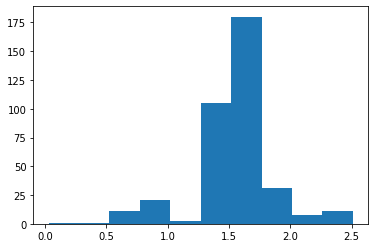

In [333]:
# bad_continuum_4 = continuum_fit_4[np.where((data_4['SFR_BEST']-np.log10(continuum_fit_4['bayes.sfh.sfr']))<-0.5)]
# bad_4           = data_4[np.where((data_4['SFR_BEST']-np.log10(continuum_fit_4['bayes.sfh.sfr']))<-0.5)]

# bad_4[bad_4['SPECZ_FMOS'] >0]
# bad_4[bad_4['line.H-alpha'] >0]
# # bad_4[bad_4['line.H-beta'] >0]
# # bad_4[bad_4['line.OIII-500.7'] >0]
# # bad_4[bad_4['line.NII-658.4'] >0]
# # bad_4[bad_4['line.SII-671.6'] >0]
# # bad_4[bad_4['line.SII-673.1'] >0]

bad_continuum = continuum_fits[np.where((data_sets['SFR_BEST']-np.log10(continuum_fits['bayes.sfh.sfr']))<-0.5)]
bad           = data_sets[np.where((data_sets['SFR_BEST']-np.log10(continuum_fits['bayes.sfh.sfr']))<-0.5)]
# bad = bad[bad['SPECZ_FMOS'] >0]
print(len(bad))
print(len(bad[bad['SPECZ_FMOS'] >0]))
# print(len(bad[bad['galex.NUV'] >0]))
# print(len(bad[bad['WFCAM_K']/bad['WFCAM_K_err'] >2]))
plt.hist(bad_continuum['best.universe.redshift'])
# plt.hist(continuum_fits['bayes.attenuation.E_BV_lines'])

# bad[bad['line.H-alpha'] >0]
# bad_4[bad_4['line.H-beta'] >0]
# bad_4[bad_4['line.OIII-500.7'] >0]
# bad_4[bad_4['line.NII-658.4'] >0]
# bad_4[bad_4['line.SII-671.6'] >0]
# bad_4[bad_4['line.SII-673.1'] >0]

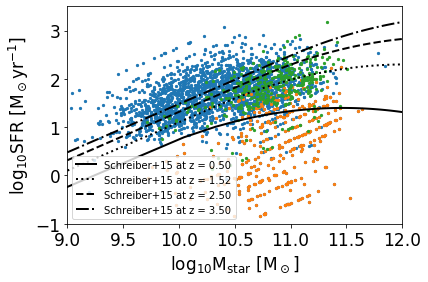

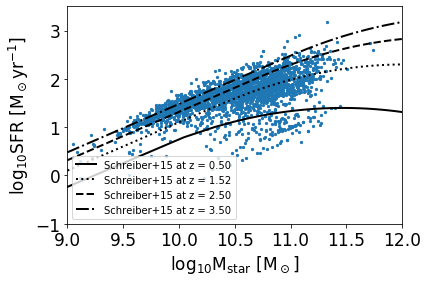

In [334]:
plt.figure()
plt.scatter(data_sets['MASS_BEST'], data_sets['SFR_BEST'], s=5)
plt.scatter(bad['MASS_BEST'], bad['SFR_BEST'], s=5)
plt.scatter(np.log10(bad_continuum['bayes.stellar.m_star']), np.log10(bad_continuum['bayes.sfh.sfr']), s=5)
# plt.scatter(data_sets['MASS_MED'], data_sets['SFR_MED'], s=5)
plt.plot(np.log10(M_star), MS(0.5,M_star), linestyle = '-', linewidth = 2.0,\
         c = 'k', label = 'Schreiber+15 at z = %.2f'%0.5)
plt.plot(np.log10(M_star), MS(np.mean(bins['redshift']),M_star), linestyle = ':', linewidth = 2.0,\
         c = 'k', label = 'Schreiber+15 at z = %.2f'%np.mean(bins['redshift']))
plt.plot(np.log10(M_star), MS(2.5,M_star), linestyle = '--', linewidth = 2.0,\
         c = 'k', label = 'Schreiber+15 at z = %.2f'%2.5)
plt.plot(np.log10(M_star), MS(3.5,M_star), linestyle = '-.', linewidth = 2.0,\
         c = 'k', label = 'Schreiber+15 at z = %.2f'%3.5)
plt.xlim(9, 12)
plt.ylim(-1, 3.5)
# plt.xlim(5, 12.5)
# plt.ylim(-3, 4)
plt.xlabel(r'$\log_{10} \mathrm{M_{star}}~\mathrm{[M_\odot]}$', fontsize = 17)
plt.ylabel(r'$\log_{10} \mathrm{SFR}~\mathrm{[M_\odot yr^{-1}]}$', fontsize = 17)
plt.tick_params(axis = 'both', which = 'major', labelsize = 17)
plt.legend()

plt.figure()
plt.scatter(np.log10(continuum_fits['bayes.stellar.m_star']), np.log10(continuum_fits['bayes.sfh.sfr']), s=5)
plt.plot(np.log10(M_star), MS(0.5,M_star), linestyle = '-', linewidth = 2.0,\
         c = 'k', label = 'Schreiber+15 at z = %.2f'%0.5)
plt.plot(np.log10(M_star), MS(np.mean(bins['redshift']),M_star), linestyle = ':', linewidth = 2.0,\
         c = 'k', label = 'Schreiber+15 at z = %.2f'%np.mean(bins['redshift']))
plt.plot(np.log10(M_star), MS(2.5,M_star), linestyle = '--', linewidth = 2.0,\
         c = 'k', label = 'Schreiber+15 at z = %.2f'%2.5)
plt.plot(np.log10(M_star), MS(3.5,M_star), linestyle = '-.', linewidth = 2.0,\
         c = 'k', label = 'Schreiber+15 at z = %.2f'%3.5)
plt.xlim(9, 12)
plt.ylim(-1, 3.5)
plt.xlabel(r'$\log_{10} \mathrm{M_{star}}~\mathrm{[M_\odot]}$', fontsize = 17)
plt.ylabel(r'$\log_{10} \mathrm{SFR}~\mathrm{[M_\odot yr^{-1}]}$', fontsize = 17)
plt.tick_params(axis = 'both', which = 'major', labelsize = 17)
plt.legend(loc='lower left')

/Users/lam/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:734: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)


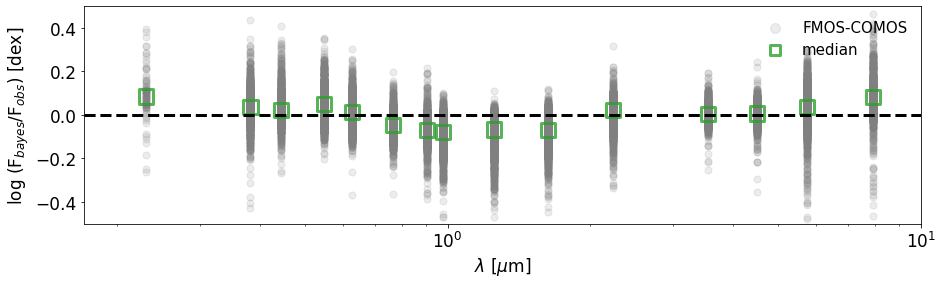

In [285]:
plt.figure(figsize = (15,4))

for i in range(len(bands_nolines)):
    
    
    data_high_snr   = bins[bins[bands_nolines[i]]/bins[bands_nolines[i]+'_err'] > 3]
    
    continuum_fit_high_snr = continuum_fits[np.where(bins[bands_nolines[i]]/bins[bands_nolines[i]+'_err'] > 3)]
    
    dif_best_obs_help_data = np.log10(continuum_fit_high_snr['bayes.'+bands_nolines[i]]) - np.log10(data_high_snr[bands_nolines[i]])
    /
    x_help_data = np.full(len(dif_best_obs_help_data), wl_phot[i])
    
    ce =  plt.scatter(x_help_data, dif_best_obs_help_data, c = 'gray', marker = 'o', s = 50, alpha = 0.15)
    
    plt.scatter(wl_phot[i], np.nanmedian(dif_best_obs_help_data[np.isfinite(dif_best_obs_help_data)]), s = 200, lw = 3, marker = 's', alpha = 0.8, facecolors='none', edgecolors='C2')

plt.xlabel('$\lambda$ [$\mu$m]', fontsize = 17)
plt.ylabel('log (F$_{bayes}$/F$_{obs}$) [dex]', fontsize = 17)
plt.tick_params(axis = 'both', which = 'major', labelsize = 17)
plt.ylim(-0.5, 0.5)
plt.xlim(0.17, 10)
plt.xscale('log')
# plt.yscale('symlog')
marker_size = 100
def update_prop(handle, orig):
    handle.update_from(orig)
    handle.set_sizes([marker_size])
plt.legend(['FMOS-COMOS', 'median'], frameon = False, prop = {'size': 15}, loc = 'upper right',\
           handler_map={type(ce): HandlerPathCollection(update_func=update_prop)})    
plt.axhline(y = 0, ls = '--', lw = 3, c = 'k')

# plt.savefig('/Users/lam/Desktop/data_fit_cf00.png', dpi = 300, bbox_inches = 'tight')